### QC Analysis of IMPALA Resequenced samples

Resequenced Samples are located at - `/nfs/turbo/umms-esnitkin/Project_IMPALA/Sequence_data/fastq/2023_03_13/7894-AM/fastqs_7894-AM/`

#### Read Illumina Demultiplex metadata and rename the sequencing reads filenames 

Exploring Sequencing Demultiplex file... 


<AxesSubplot:title={'center':'Plotting # of reads from the sequencing run...'}, ylabel='Description'>

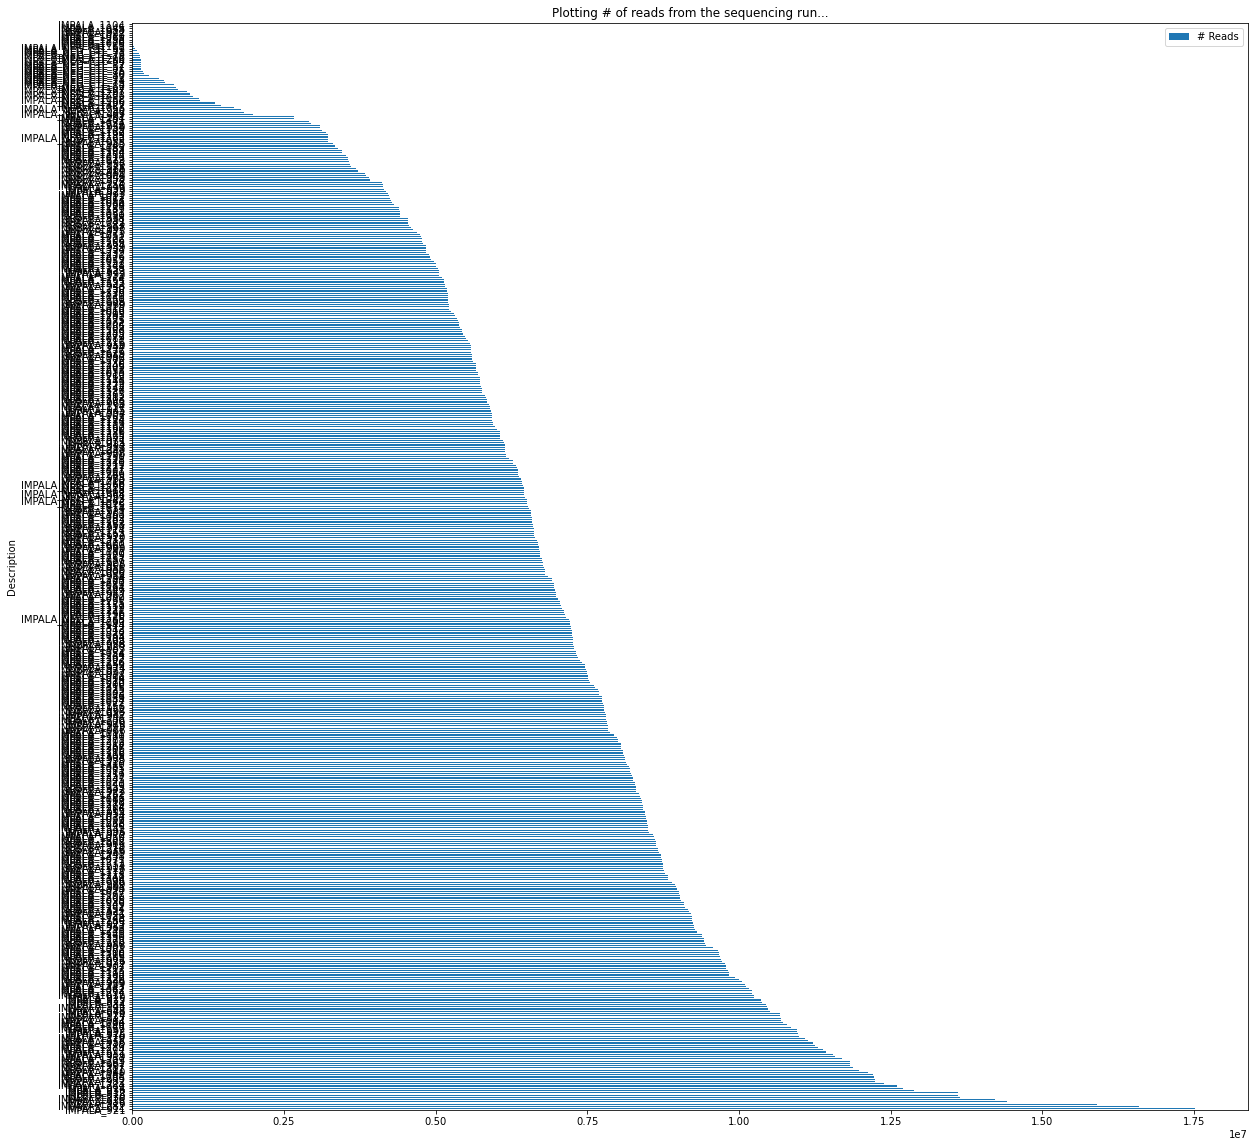

In [2]:
# Import Libraries and set path
import numpy as np
import pandas as pd
from IPython.display import HTML
import os
import readline
import argparse
from itertools import islice
import subprocess
# Set this option for pandas to print data
pd.set_option("display.max_rows", None, "display.max_columns", None)
os.chdir("/nfs/turbo/umms-esnitkin/Project_IMPALA/Sequence_data/fastq/2023_03_13/7894-AM/fastqs_7894-AM/")

print ("\033[1m" + "Exploring Sequencing Demultiplex file... "+ "\033[0m")
pd.set_option("display.max_rows", None, "display.max_columns", None)
resequenced_batch_Demultiplex = pd.read_csv("/nfs/turbo/umms-esnitkin/Project_IMPALA/Sequence_data/fastq/2023_03_13/DemuxStats_7894-AM.csv", sep=',', header=0)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 20]
resequenced_batch_Demultiplex.sort_values(by='# Reads',ascending=False).plot(x='Description', y='# Reads', kind="barh", title="Plotting # of reads from the sequencing run...")

# Renaming the samples by Sampld ID.
# os.chdir("")
# for index, row in resequenced_batch_Demultiplex.iterrows():
#     #print("mv", "%s_S*_R1_001.fastq.gz" % row['Sample_ID'], "%s_R1.fastq.gz" % row['Description'])
#     os.system("mv %s_S*_R1_001.fastq.gz %s_R1.fastq.gz" % (row['Sample_ID'], row['Description']))
# for index, row in resequenced_batch_Demultiplex.iterrows():
#     #print("mv", "%s_S*R2_001.fastq.gz" % row['Sample_ID'], "%s_R2.fastq.gz" % row['Description'])
#     os.system("mv %s_S*_R2_001.fastq.gz %s_R2.fastq.gz" % (row['Sample_ID'], row['Description']))

#### Receive meta-data sheets associated with project

- Get the DNA extraction data from Evan and note if any samples have low DNA or if any negative controls have high DNA.
- Get Sample ID -> Genome ID metadata from Evan
- Problem samples based on DNA concentration
- Expected species (if known)
- Metadata for the Project is located in: `Insert Path Here`

#### Run QC'd pipeline on Sequencing data

In [3]:
# os.chdir("/nfs/turbo/umms-esnitkin/Project_IMPALA/Analysis/2023_03_15_IMPALA_resequenced_QC")
# !mkdir 2023_03_15_IMPALA_resequenced_QC
# os.chdir("/nfs/turbo/umms-esnitkin/Project_IMPALA/Analysis/2023_03_15_IMPALA_resequenced_QC/2023_03_15_IMPALA_resequenced_QC")

In [4]:
# !ls /nfs/turbo/umms-esnitkin/Project_IMPALA/Sequence_data/fastq/2023_03_13/7894-AM/fastqs_7894-AM/*R1.fastq.gz | cut -d'/' -f11 > samplenames.txt

#### Evaluate Raw Sequencing Coverage 

In [5]:
import os
os.chdir("/nfs/turbo/umms-esnitkin/Project_IMPALA/Analysis/2023_03_15_IMPALA_resequenced_QC/")
resequenced_batch = pd.read_csv("2023_03_15_IMPALA_resequenced_QC_Final_Coverage.txt", sep=',', header=0)
resequenced_batch = resequenced_batch.replace(['_R1.fastq.gz'], '', regex=True)
resequenced_batch['Coverage'].describe()

count     480.000000
mean      408.821968
std       181.392331
min         0.114156
25%       314.199750
50%       409.362000
75%       519.546250
max      1057.980000
Name: Coverage, dtype: float64

In [6]:
len(resequenced_batch)

480

In [7]:
print ("\033[1m" + "Exploring NEG Control samples: 7 control samples have unusually high number of reads. "+ "\033[0m")

Exploring NEG Control samples: 7 control samples have unusually high number of reads. 


In [8]:
resequenced_batch_NEG_CNTL = resequenced_batch[resequenced_batch.Sample_name.str.match('(.*NEG*)')]

resequenced_batch_NEG_CNTL[resequenced_batch_NEG_CNTL['Coverage'] > 100]

,Sample_name,Total_reads,Total_bp,MeanReadLength,Coverage
453,IMPALA_NEG_CTL_56,3371120,509039120,151,101.808
457,IMPALA_NEG_CTL_60,12848470,1940118970,151,388.024
459,IMPALA_NEG_CTL_62,13002920,1963440920,151,392.688
460,IMPALA_NEG_CTL_63,6447658,973596358,151,194.719
462,IMPALA_NEG_CTL_65,14283318,2156781018,151,431.356
465,IMPALA_NEG_CTL_68,12927370,1952032870,151,390.407
466,IMPALA_NEG_CTL_69,3690972,557336772,151,111.467


In [9]:
len(resequenced_batch_NEG_CNTL)

27

In [10]:
len(resequenced_batch_NEG_CNTL[resequenced_batch_NEG_CNTL['Coverage'] > 100])

7

<AxesSubplot:ylabel='Sample_name'>

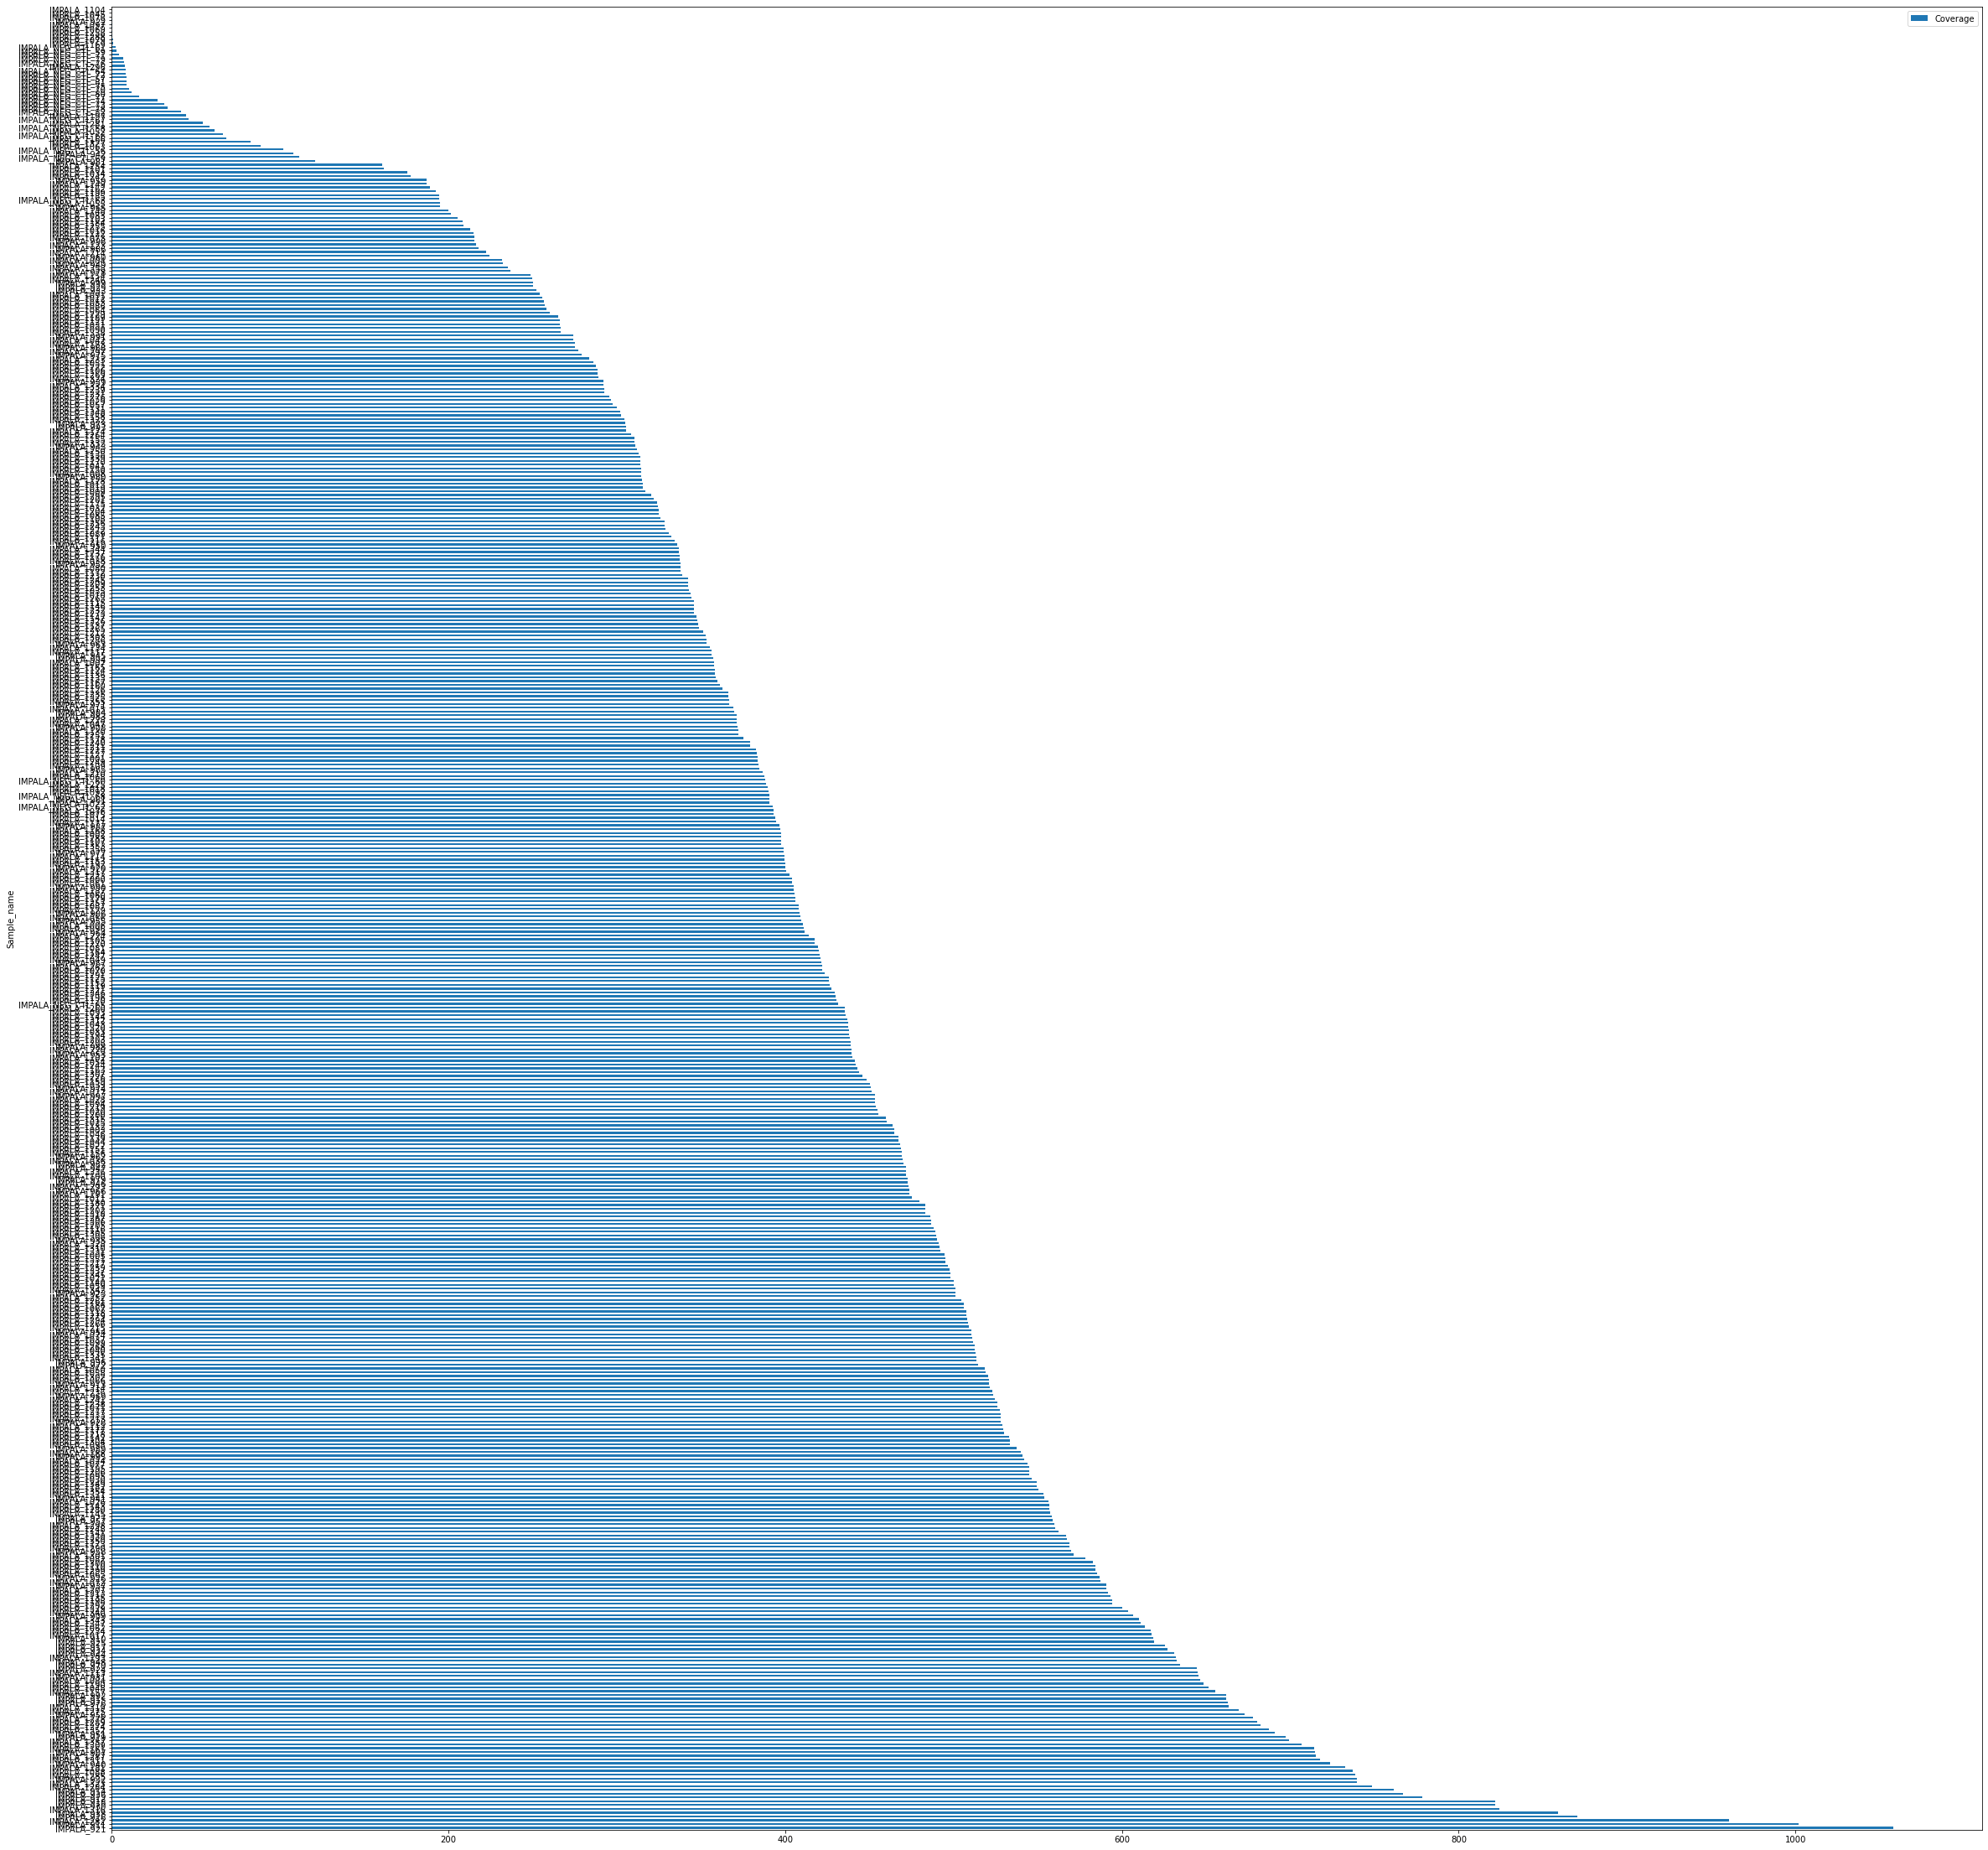

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [40, 40]
colormat=np.where(resequenced_batch['Coverage'] < 30, 'r','b')
#resequenced_batch.plot(x='Sample_name', y='Coverage', kind="bar", color=colormat, width=1, sort_columns=True)
resequenced_batch.sort_values(by='Coverage',ascending=False).plot(x='Sample_name', y='Coverage', kind="barh")

In [12]:
# Excluding other negative control samples that has less than 30X coverage, there are 11 samples with almost no reads.
resequenced_batch[resequenced_batch['Coverage'] < 30]

,Sample_name,Total_reads,Total_bp,MeanReadLength,Coverage
45,IMPALA_1045,4462,673762,151,0.134752
69,IMPALA_1069,9764,1474364,151,0.294873
78,IMPALA_1078,4764,719364,151,0.143873
79,IMPALA_1079,25674,3876774,151,0.775355
97,IMPALA_1097,8234,1243334,151,0.248667
104,IMPALA_1104,3780,570780,151,0.114156
169,IMPALA_1169,31096,4695496,151,0.939099
258,IMPALA_1258,15324,2313924,151,0.462785
288,IMPALA_1288,18464,2788064,151,0.557613
296,IMPALA_1296,256476,38727876,151,7.745580


#### Ariba CARD Summary

/sw/pkgs/arc/python3.9-anaconda/2021.11/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


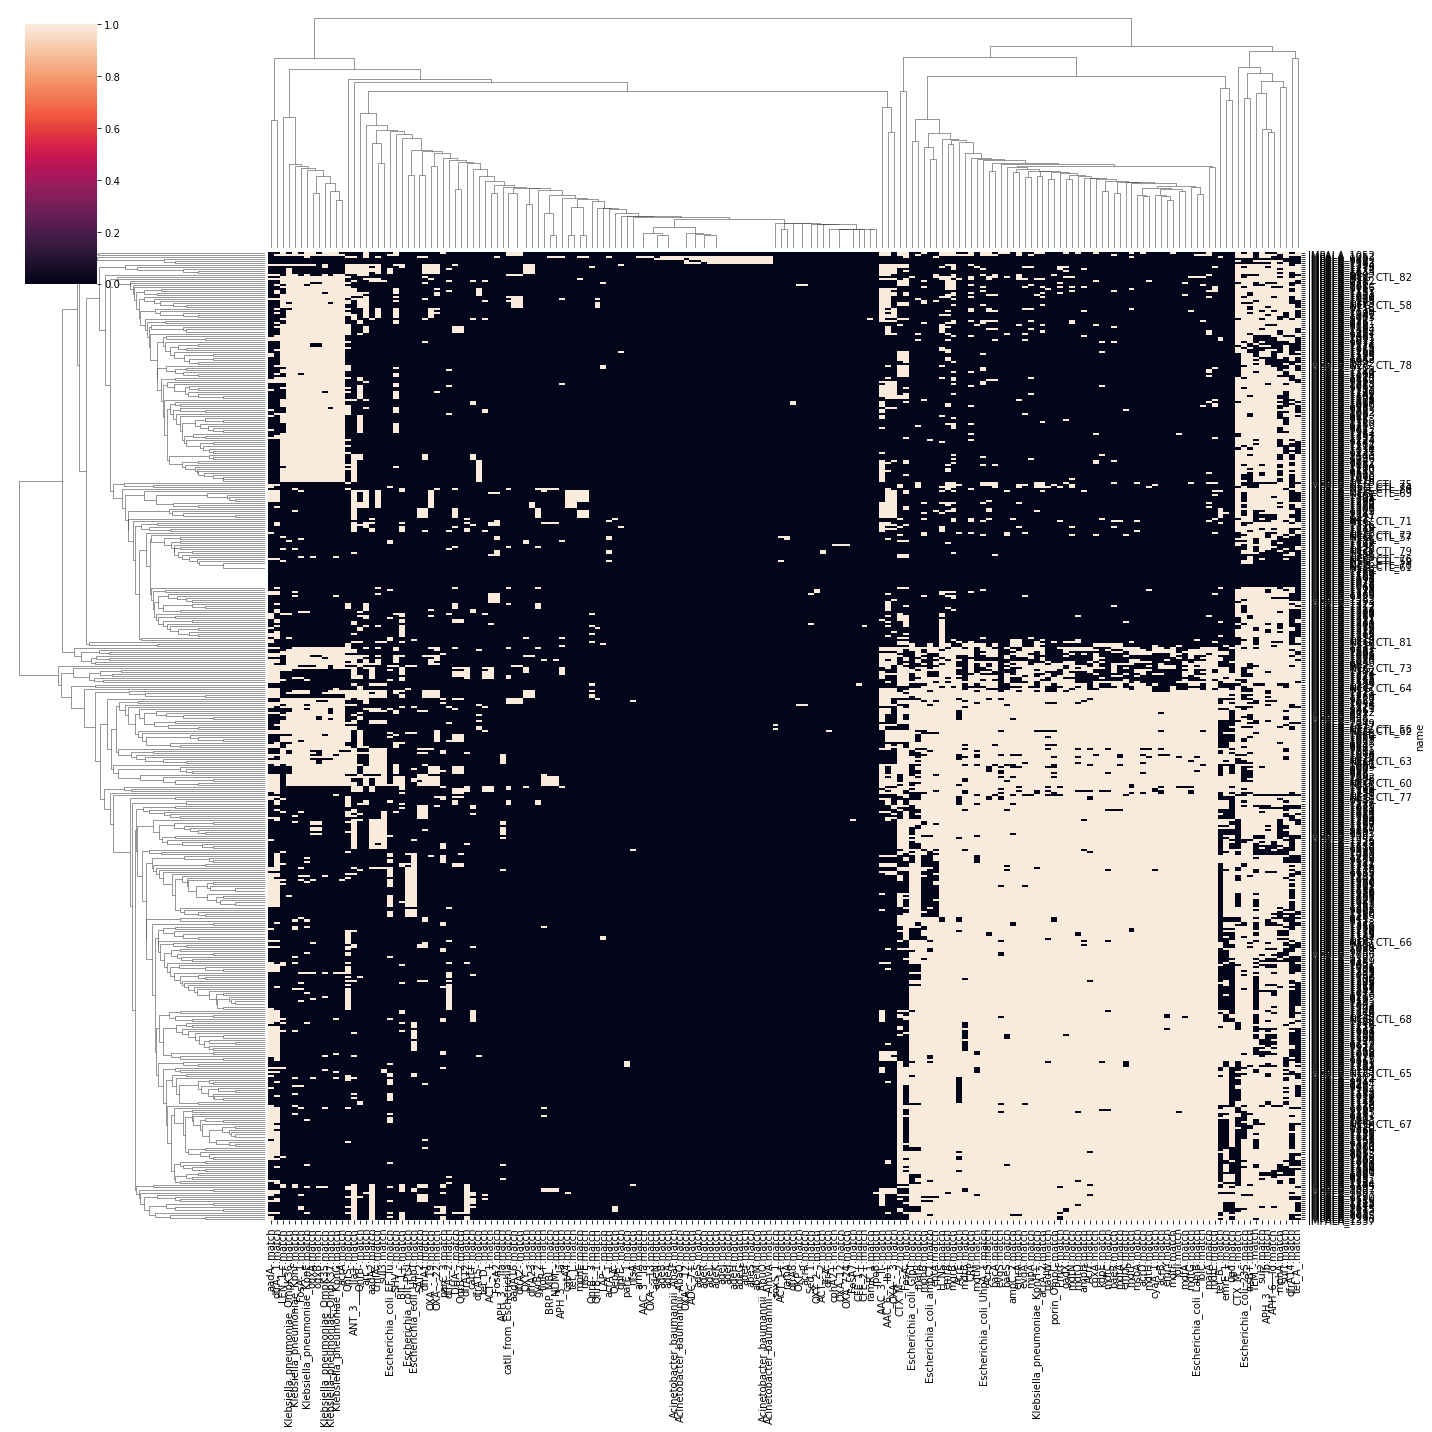

In [13]:
os.chdir("/nfs/turbo/umms-esnitkin/Project_IMPALA/Analysis/2023_03_15_IMPALA_resequenced_QC/2023_03_15_IMPALA_resequenced_QC_AMR_results/")
import seaborn as sns
import matplotlib.pyplot as plt
ariba_minimal = pd.read_csv("2023_03_15_IMPALA_resequenced_QC_AMR_minimal.csv", sep=',', header=0)
ariba_minimal = ariba_minimal.replace(['yes'], '1')
ariba_minimal = ariba_minimal.replace(['no'], '0')
# ariba_minimal["sum"] = ariba_minimal.iloc[:, 2:].sum(axis=1)
# ariba_minimal.iloc[:,2:].sum(axis=1)
rownames = ariba_minimal.iloc[:,0]
rownames = rownames.replace(['_/report.tsv'], '', regex=True)
rownames = rownames.replace(['2023_03_15_IMPALA_resequenced_QC_AMR_results/'], '', regex=True)
rownames = rownames.replace(['/report.tsv'], '', regex=True)
ariba_minimal = (ariba_minimal.iloc[:, 1:]).apply(pd.to_numeric)
#sns.heatmap(ariba_minimal, xticklabels=True, yticklabels=True)
ariba_minimal = ariba_minimal.set_index(rownames)
# plt.rcParams['figure.figsize'] = [150, 100]
# fig, ax = plt.subplots(figsize=(50, 50))
sns.clustermap(ariba_minimal, xticklabels=True, yticklabels=True, figsize=(20, 20))

In [14]:
ariba_minimal["# of AMR genes detected by ARIBA"] = ariba_minimal.iloc[:,1:].sum(axis=1)
ariba_minimal['Sample_name'] = ariba_minimal.index
ariba_minimal.rename(columns = {'name':'Sample_name'}, inplace = True)

In [15]:
card_dist = ariba_minimal[['Sample_name', '# of AMR genes detected by ARIBA']]

<AxesSubplot:title={'center':'# of AMR genes detected by ARIBA'}, ylabel='Sample_name'>

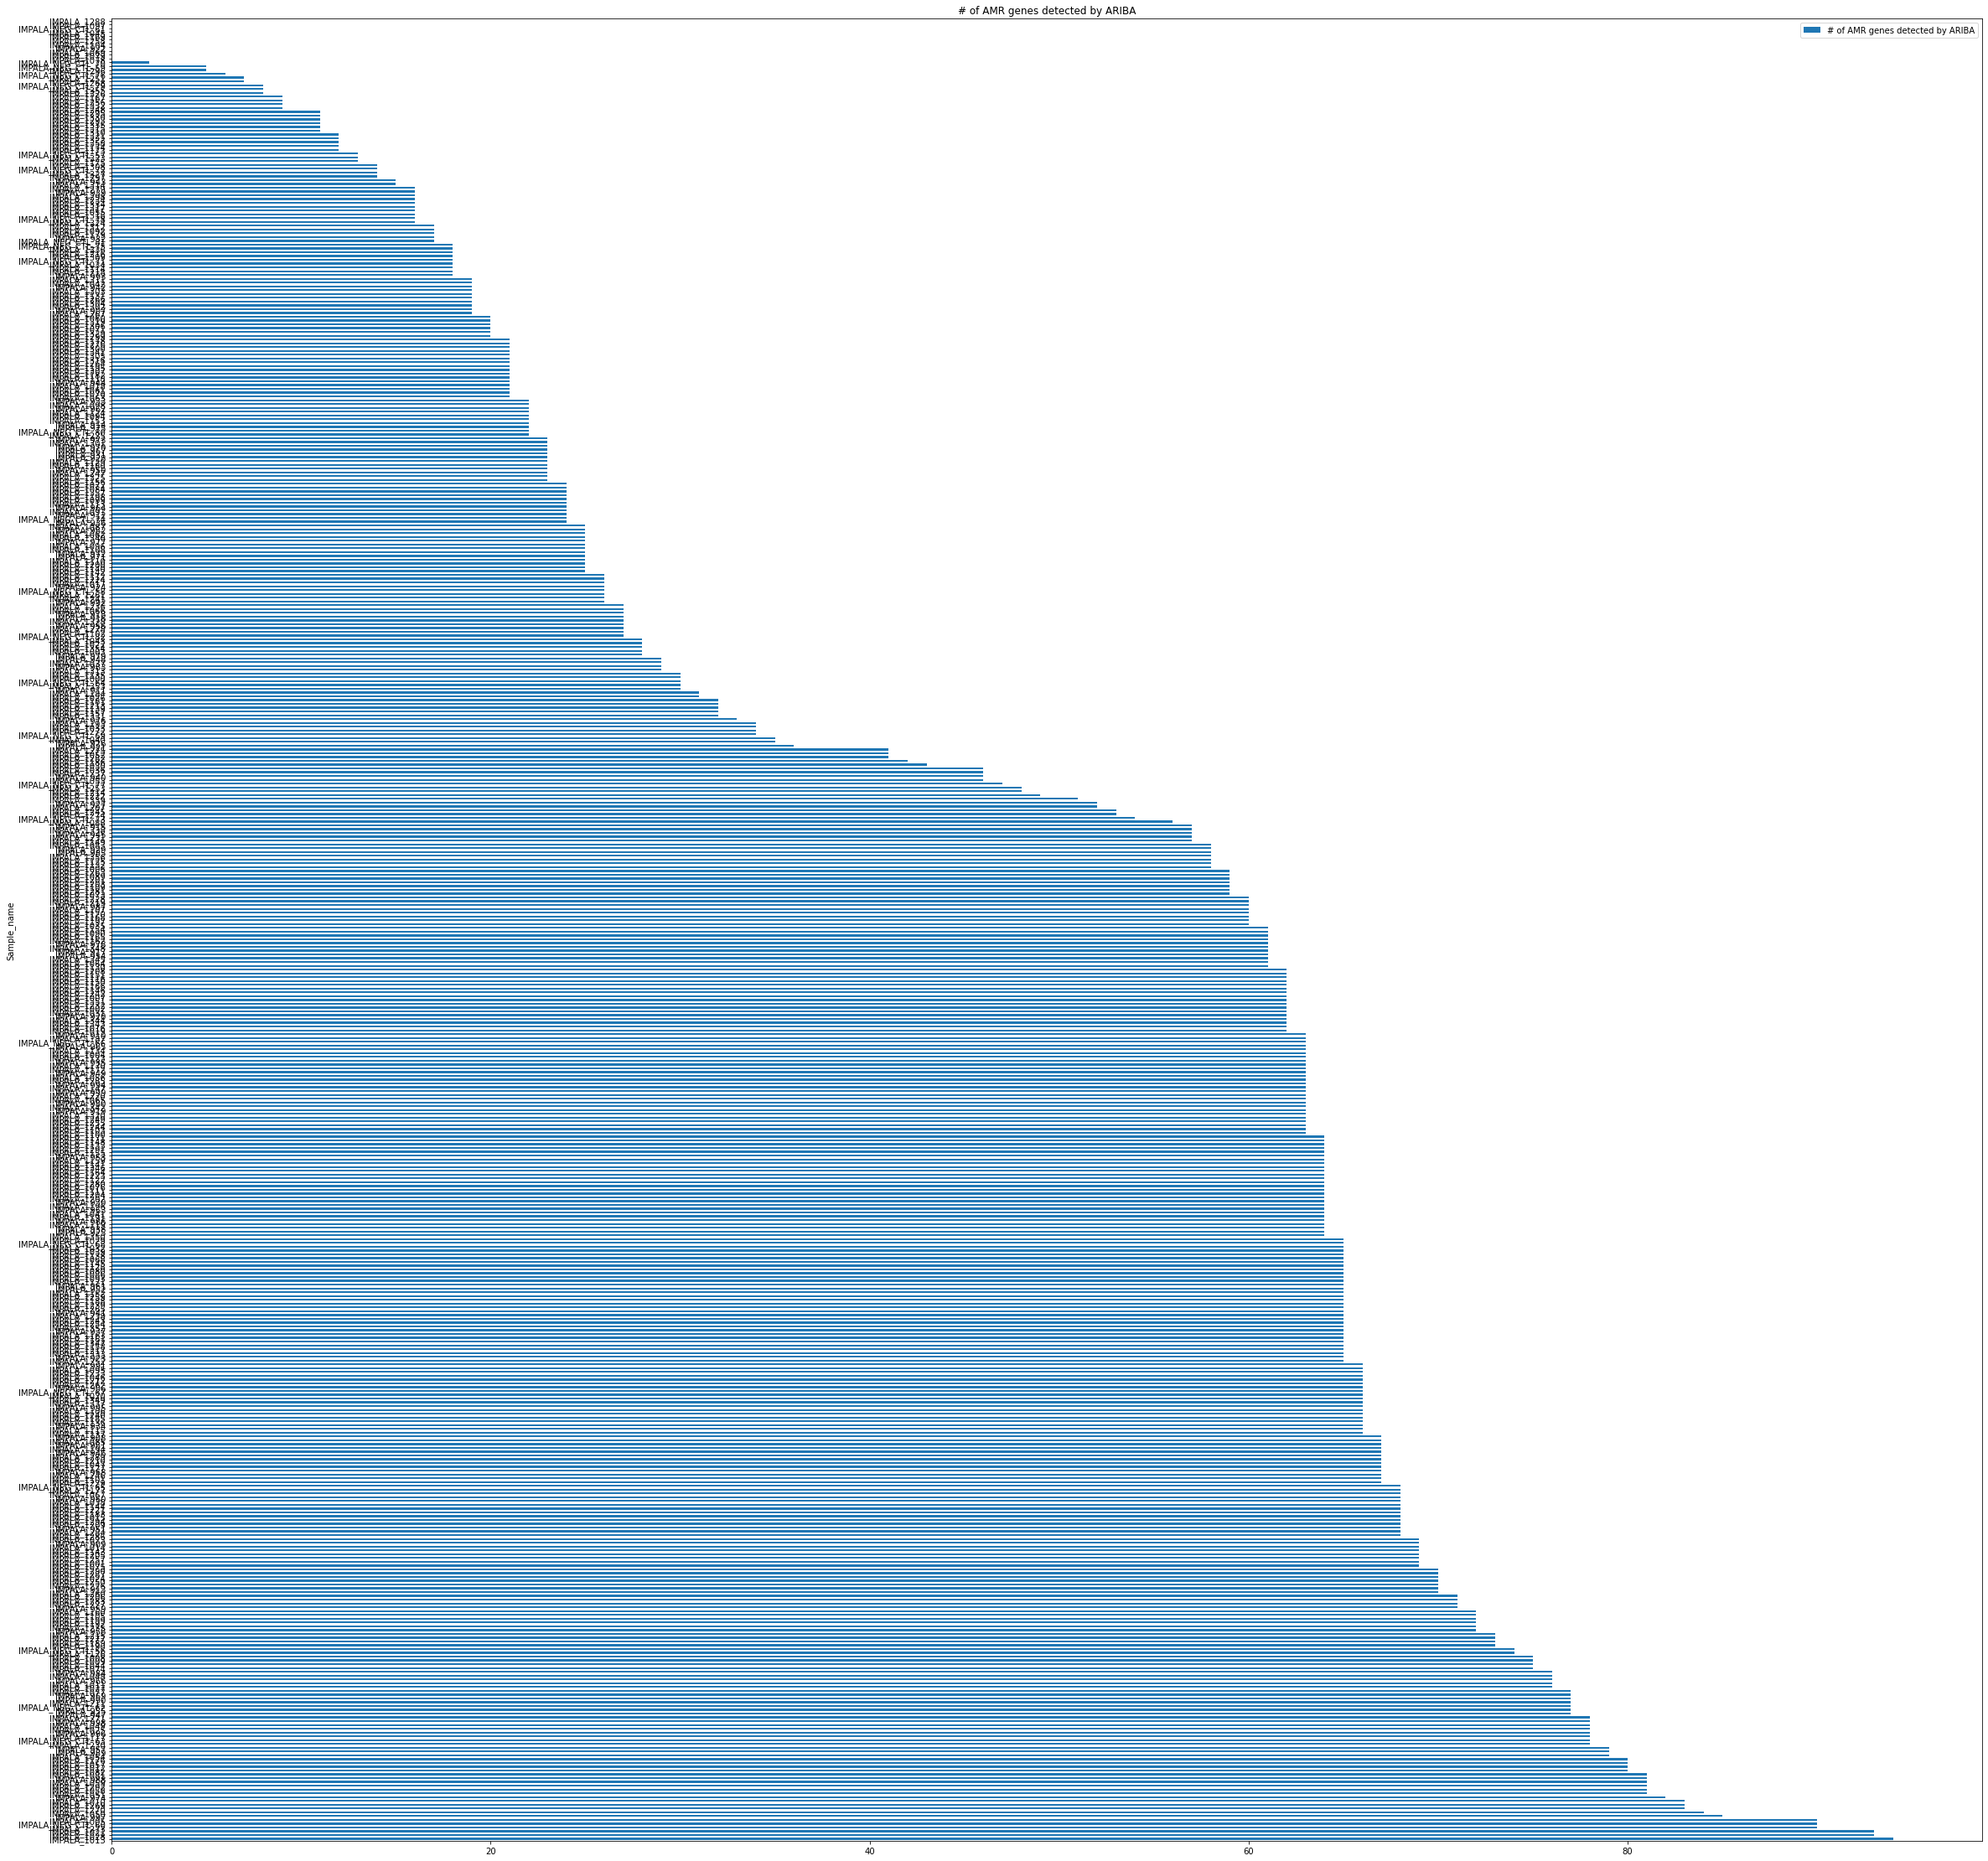

In [16]:
ariba_minimal.sort_values(by='# of AMR genes detected by ARIBA',ascending=False).plot(x='Sample_name', y='# of AMR genes detected by ARIBA', kind="barh", title="# of AMR genes detected by ARIBA")

#### Kraken Report

In [17]:
# Import Libraries and set path
import numpy as np
import pandas as pd
from IPython.display import HTML
import os
import readline
import argparse
from itertools import islice
import subprocess
# Set this option for pandas to print data
pd.set_option("display.max_rows", None, "display.max_columns", None)
os.chdir("/nfs/turbo/umms-esnitkin/Project_IMPALA/Analysis/2023_03_15_IMPALA_resequenced_QC/2023_03_15_IMPALA_resequenced_QC_Kraken_results/")

In [18]:
kraken = pd.read_csv("Kraken_report_final.csv", sep=',', header=0)
kraken = kraken.replace(['_R1.fastq.gz'], '', regex=True)
kraken.rename(columns = {'Sample':'Sample_name'}, inplace = True)

In [19]:
print ("\033[1m" + "Species\tCount" + "\033[0m")
kraken['Species'].value_counts()

Species	Count


Escherichiacoli                                   242
Klebsiellapneumoniae                              148
Citrobacterfreundii                                22
Morganellamorganii                                 15
Klebsiellaoxytoca                                  10
Proteusmirabilis                                   10
Enterobacterhormaechei                              7
Acinetobacterbaumannii                              3
Enterobactercloacae                                 3
Enterobactercloacaecomplex'HoffmannclusterIV'       2
Aeromonasveronii                                    2
Citrobacteramalonaticus                             2
Escherichiafergusonii                               2
Enterobacterasburiae                                2
Klebsiellavariicola                                 2
Enterobacterxiangfangensis                          1
Citrobacterbraakii                                  1
Citrobacterrodentium                                1
Enterobactercloacaecomplex'H

In [20]:
kraken_secondary = pd.read_csv("Kraken_report_secondary_final.csv", sep=',', header=0)
kraken_secondary = kraken_secondary.replace(['_R1.fastq.gz'], '', regex=True)
kraken_secondary.rename(columns = {'Sample':'Sample_name'}, inplace = True)

In [21]:
print ("\033[1m" + "Species\tCount" + "\033[0m")
kraken_secondary[' Secondary Species'].value_counts()

Species	Count


Klebsiella pneumoniae                     180
Pseudomonas fluorescens                   112
Escherichia coli                          111
Salmonella enterica                        17
Citrobacter freundii                       13
Enterobacter cloacae                        5
Providencia rettgeri                        5
Citrobacter braakii                         5
Enterobacter hormaechei                     5
Klebsiella oxytoca                          3
Citrobacter sp. FDAARGOS_156                3
Morganella morganii                         3
Enterobacter xiangfangensis                 2
Enterobacter kobei                          2
Enterobacter cloacae complex sp. 35734      2
Klebsiella variicola                        1
Acinetobacter nosocomialis                  1
Citrobacter rodentium                       1
Citrobacter amalonaticus                    1
Enterobacter asburiae                       1
Aeromonas hydrophila                        1
Escherichia albertii              

#### FastQC and MultiQC Analysis

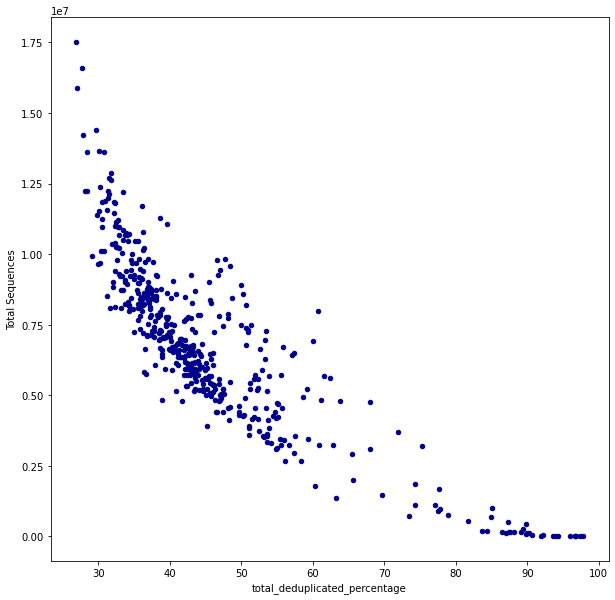

In [22]:
os.chdir("/nfs/turbo/umms-esnitkin/Project_IMPALA/Analysis/2023_03_15_IMPALA_resequenced_QC/")
multiqc_summary = pd.read_csv("/nfs/turbo/umms-esnitkin/Project_IMPALA/Analysis/2023_03_15_IMPALA_resequenced_QC/2023_03_15_IMPALA_resequenced_QC_Multiqc_reports/2023_03_15_IMPALA_resequenced_QC_Forward_fastqc_data/multiqc_fastqc.txt", sep='\t', header=0)
#multiqc_summary.columns = ['Sample_name', 'FastQC_percent_duplicates', 'FastQC_percent_gc', 'FastQC_avg_sequence_length', 'FastQC_total_sequences', 'FastQC_percent_fails']
# multiqc_summary
multiqc_summary = multiqc_summary.replace(['_forward_paired.fq.gz'], '', regex=True)
multiqc_summary = multiqc_summary.replace(['_forward_paired'], '', regex=True)
multiqc_summary = multiqc_summary.replace(['_R1'], '', regex=True)
plt.rcParams['figure.figsize'] = [10, 10]
ax1 = multiqc_summary.plot.scatter(x = 'total_deduplicated_percentage', y = 'Total Sequences', c = 'DarkBlue')

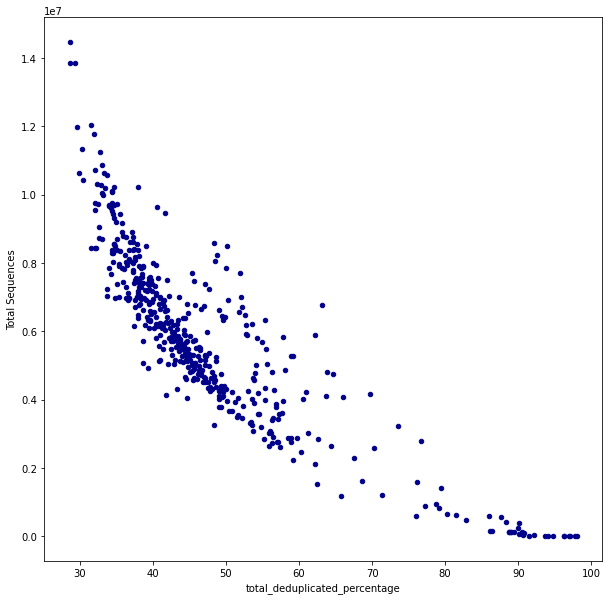

In [23]:
os.chdir("/nfs/turbo/umms-esnitkin/Project_IMPALA/Analysis/2023_03_15_IMPALA_resequenced_QC/2023_03_15_IMPALA_resequenced_QC_AfterTrimQC_results/")
AfterTrim_multiqc_summary = pd.read_csv("/nfs/turbo/umms-esnitkin/Project_IMPALA/Analysis/2023_03_15_IMPALA_resequenced_QC////2023_03_15_IMPALA_resequenced_QC_AfterTrimQC_results/2023_03_15_IMPALA_resequenced_QC_Forward_fastqc_data/multiqc_fastqc.txt", sep='\t', header=0)
#multiqc_summary.columns = ['Sample_name', 'FastQC_percent_duplicates', 'FastQC_percent_gc', 'FastQC_avg_sequence_length', 'FastQC_total_sequences', 'FastQC_percent_fails']
# multiqc_summary
AfterTrim_multiqc_summary = AfterTrim_multiqc_summary.replace(['_forward_paired.fq.gz'], '', regex=True)
AfterTrim_multiqc_summary = AfterTrim_multiqc_summary.replace(['_forward_paired'], '', regex=True)
plt.rcParams['figure.figsize'] = [10, 10]
ax1 = AfterTrim_multiqc_summary.plot.scatter(x = 'total_deduplicated_percentage', y = 'Total Sequences', c = 'DarkBlue')

#### Genome Assembly

count    4.730000e+02
mean     6.207421e+06
std      3.066353e+06
min      5.660000e+02
25%      4.909702e+06
50%      5.298176e+06
75%      5.710143e+06
max      2.269416e+07
Name: Total length (>= 0 bp), dtype: float64

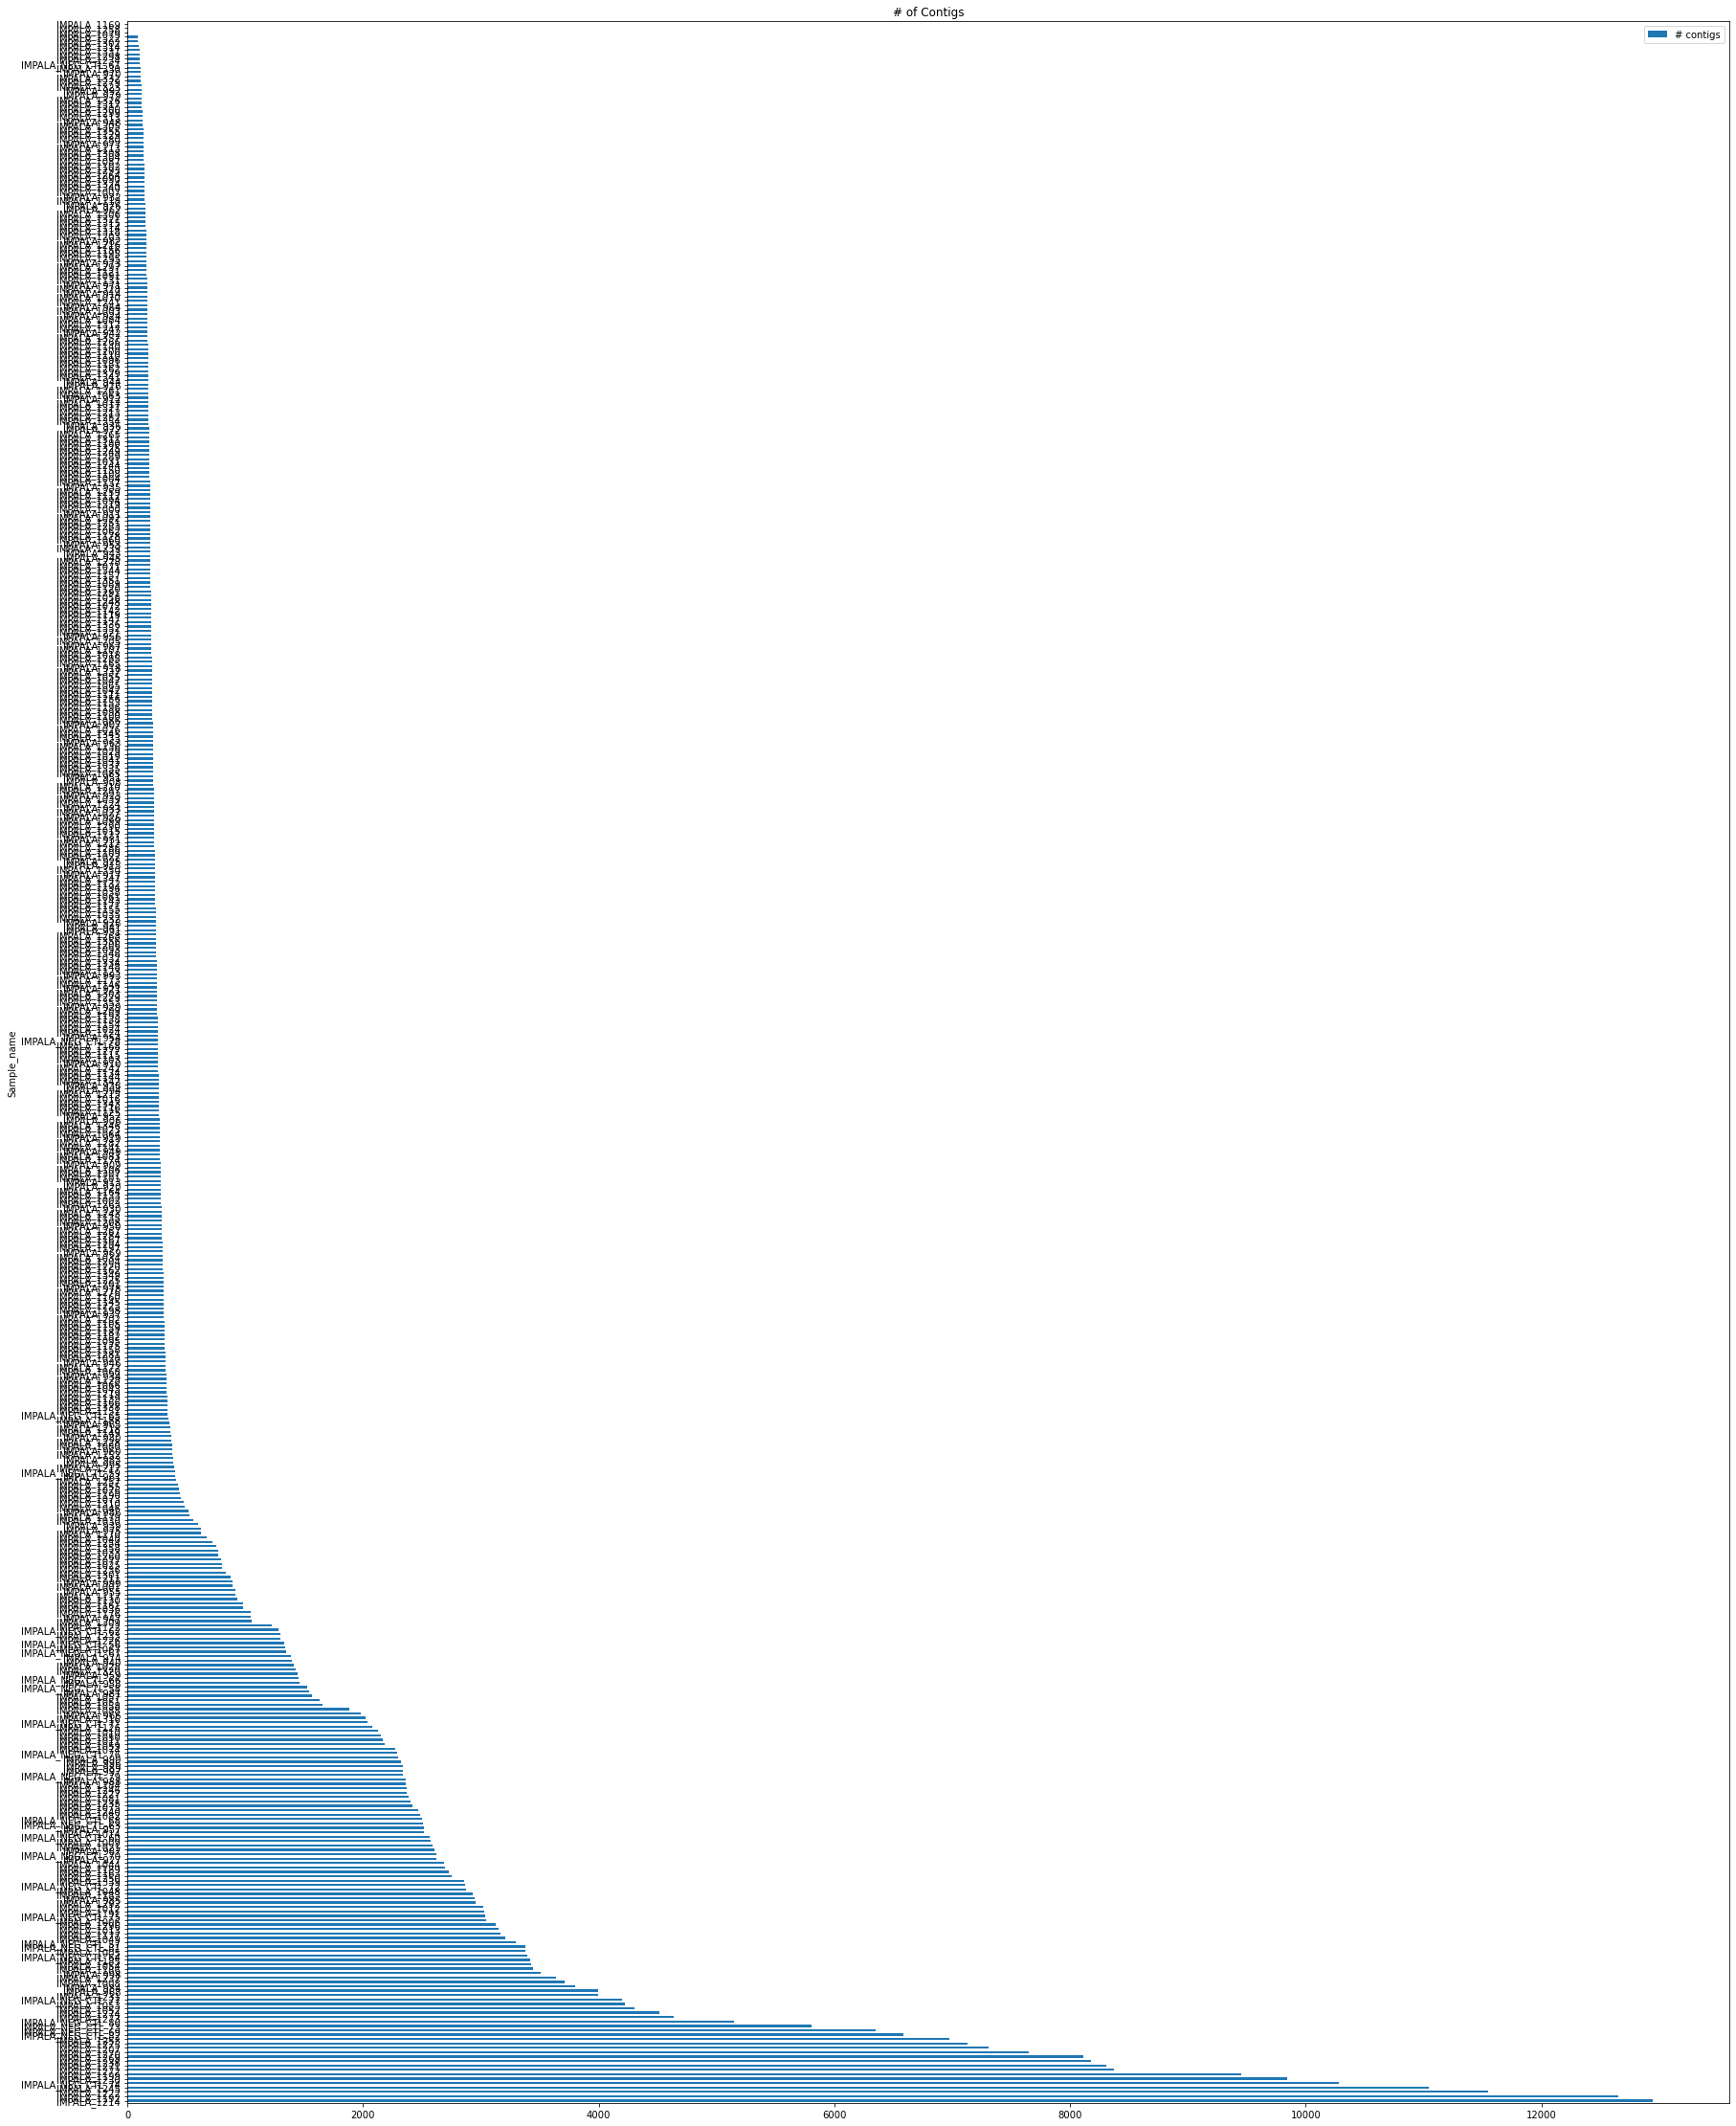

In [24]:
os.chdir("/nfs/turbo/umms-esnitkin/Project_IMPALA/Analysis/2023_03_15_IMPALA_resequenced_Assembly/Report/Quast/2023_03_21_09_22_12_assembly_report_data")

Assembly_multiqc_quast_summary = pd.read_csv("multiqc_quast.txt", sep='\t', header=0)
Assembly_multiqc_quast_summary = Assembly_multiqc_quast_summary.replace(['_l500_contigs'], '', regex=True)
Assembly_multiqc_quast_summary.rename(columns = {'Sample':'Sample_name'}, inplace = True)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 40]
Assembly_multiqc_quast_summary.sort_values(by='# contigs',ascending=False).plot(x='Sample_name', y='# contigs', kind="barh", title="# of Contigs")

Assembly_multiqc_quast_summary['# contigs'].describe()

Assembly_multiqc_quast_summary['Total length (>= 0 bp)'].describe()


#### Visualize QC metrics

In [25]:
multiqc_summary.rename(columns = {'Sample':'Sample_name'}, inplace = True)
AfterTrim_multiqc_summary.rename(columns = {'Sample':'Sample_name'}, inplace = True)
QC_summary_temp2 = pd.merge(resequenced_batch, card_dist, on=["Sample_name", "Sample_name"])
QC_summary_temp3 = pd.merge(QC_summary_temp2, kraken, on=["Sample_name", "Sample_name"])
QC_summary_temp4 = pd.merge(QC_summary_temp3, kraken_secondary, on=["Sample_name", "Sample_name"])
QC_summary_temp5 = pd.merge(QC_summary_temp4, multiqc_summary, on=["Sample_name", "Sample_name"])
QC_summary_temp6 = pd.merge(QC_summary_temp5, AfterTrim_multiqc_summary, on=["Sample_name", "Sample_name"])
QC_summary_temp = pd.merge(QC_summary_temp6, Assembly_multiqc_quast_summary, on=["Sample_name", "Sample_name"])

In [26]:
# Read in Sequencing Plate Metadata
sequencing_plate_metadata = pd.read_csv("/nfs/turbo/umms-esnitkin/Project_IMPALA/Analysis/2023_03_15_IMPALA_resequenced_QC/2023-02-20_IMPALA_genome_sample_lookup.txt", sep='\t', header=0)
sequencing_plate_metadata.rename(columns = {'Genome ID':'Sample_name'}, inplace = True)

In [27]:
QC_summary = pd.merge(QC_summary_temp, sequencing_plate_metadata, on=["Sample_name", "Sample_name"])
QC_summary['Sequencing plate #'] = QC_summary['Sequencing plate'].str.split(',').str[0]
QC_summary['Sequencing plate well'] = QC_summary['Sequencing plate'].str.split(',').str[1]
QC_summary['Sequencing plate well location'] = QC_summary['Sequencing plate well'].str.split('-').str[0]
QC_summary['Sequencing plate well cell #'] = QC_summary['Sequencing plate well'].str.split('-').str[1]

In [28]:
QC_summary['Sequencing plate'].describe()

count                          446
unique                         446
top       Sequencing plate 12, C-1
freq                             1
Name: Sequencing plate, dtype: object

In [29]:
QC_summary['Sequencing plate #'].describe()

count                     446
unique                      5
top       Sequencing plate 14
freq                       94
Name: Sequencing plate #, dtype: object

In [30]:
QC_summary['Sequencing plate #'].unique()

array(['Sequencing plate 12', 'Sequencing plate 13',
       'Sequencing plate 14', 'Sequencing plate 15',
       'Sequencing plate 11'], dtype=object)

In [31]:
len(sorted(QC_summary['Sequencing plate well'].unique()))

96

In [32]:
QC_summary.to_csv("/nfs/turbo/umms-esnitkin/Project_IMPALA/Analysis/2023_03_15_IMPALA_resequenced_QC/2023-03-15_IMPALA_Resequenced_QC_summary.csv", index=False)  

In [33]:
# plt.rcParams['figure.figsize'] = [20, 10]
# #ax1 = QC_MLST_CARD_Kraken_assembly_multiqc_summary_without_negative.plot.scatter(x = '# contigs', y = 'Total length (>= 0 bp)', hue='Species')
# g = sns.scatterplot(data=QC_summary, x='# contigs (>= 1000 bp)', y='Total length (>= 1000 bp)', hue='Species', s=100, style='Species')
# g.legend(loc='right', bbox_to_anchor=(1.30, 0.5), ncol=1)
# plt.title('All the assemblies')

In [34]:
# plt.rcParams['figure.figsize'] = [20, 10]
# #ax1 = QC_MLST_CARD_Kraken_assembly_multiqc_summary_without_negative.plot.scatter(x = '# contigs', y = 'Total length (>= 0 bp)', hue='Species')
# g = sns.scatterplot(data=QC_summary, x='# contigs (>= 1000 bp)', y='GC (%)', hue='Species', s=100, style='Species')
# g.legend(loc='right', bbox_to_anchor=(1.30, 0.5), ncol=1)
# plt.title('All the assemblies - GC%')

In [35]:
# plt.rcParams['figure.figsize'] = [20, 10]
# #ax1 = QC_MLST_CARD_Kraken_assembly_multiqc_summary_without_negative.plot.scatter(x = '# contigs', y = 'Total length (>= 0 bp)', hue='Species')
# g = sns.scatterplot(data=QC_summary, x='# contigs (>= 1000 bp)', y='Coverage', hue='Species', s=100, style='Species')
# g.legend(loc='right', bbox_to_anchor=(1.30, 0.5), ncol=1)
# plt.title('All the assemblies - Coverage')

In [36]:
QC_summary_without_negative = QC_summary[QC_summary["Sample_name"].str.contains("NEG")==False]

In [37]:
QC_summary_without_negative['Total length (>= 1000 bp)'] = QC_summary_without_negative['Total length (>= 1000 bp)'].div(1000000).round(2)

In [38]:
len(QC_summary_without_negative)

446

##### All the assemblies excluding NEG controls

#### Number of contigs in Assembly vs Assembly length

Text(0.5, 1.0, 'All the Samples excluding NEG controls')

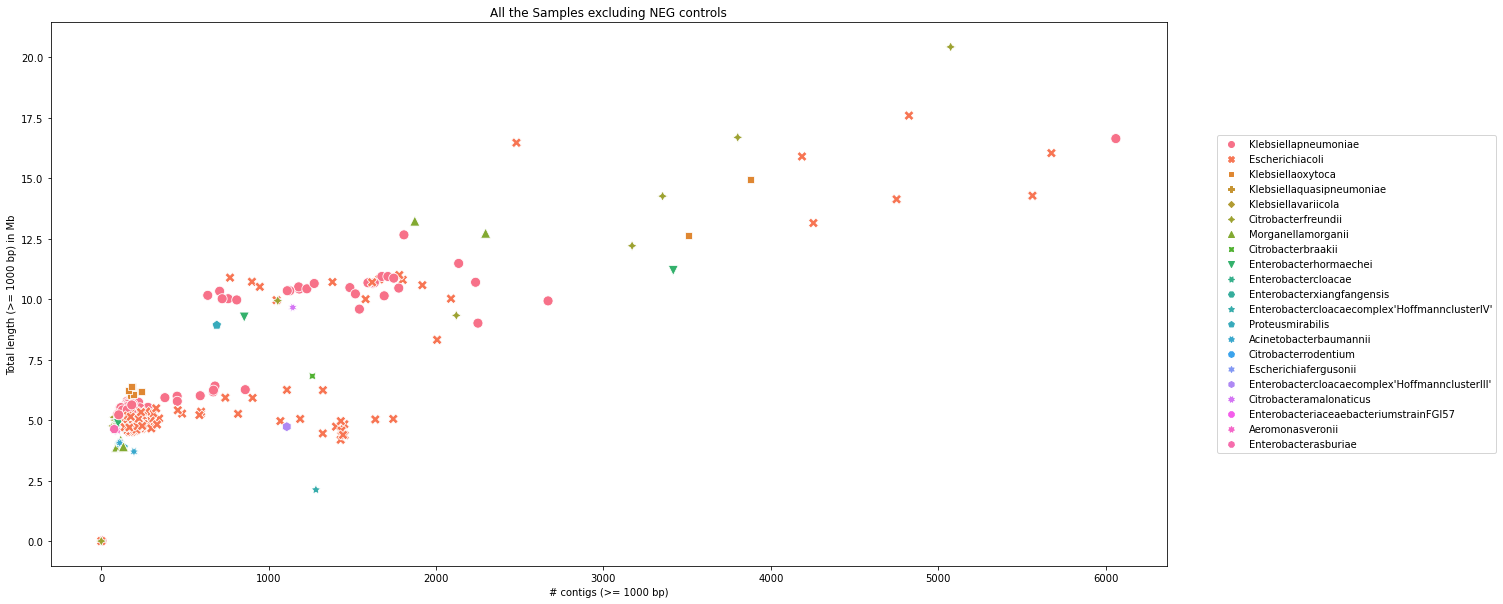

In [39]:
plt.rcParams['figure.figsize'] = [20, 10]
#ax1 = QC_MLST_CARD_Kraken_assembly_multiqc_summary_without_negative.plot.scatter(x = '# contigs', y = 'Total length (>= 0 bp)', hue='Species')
g = sns.scatterplot(data=QC_summary_without_negative, x='# contigs (>= 1000 bp)', y='Total length (>= 1000 bp)', hue='Species', s=100, style='Species')
g.legend(loc='right', bbox_to_anchor=(1.30, 0.5), ncol=1)
g.set_ylabel("Total length (>= 1000 bp) in Mb")
plt.title('All the Samples excluding NEG controls')

#### Number of Contigs in assembly vs GC%

Text(0.5, 1.0, 'All the assemblies excluding NEG controls')

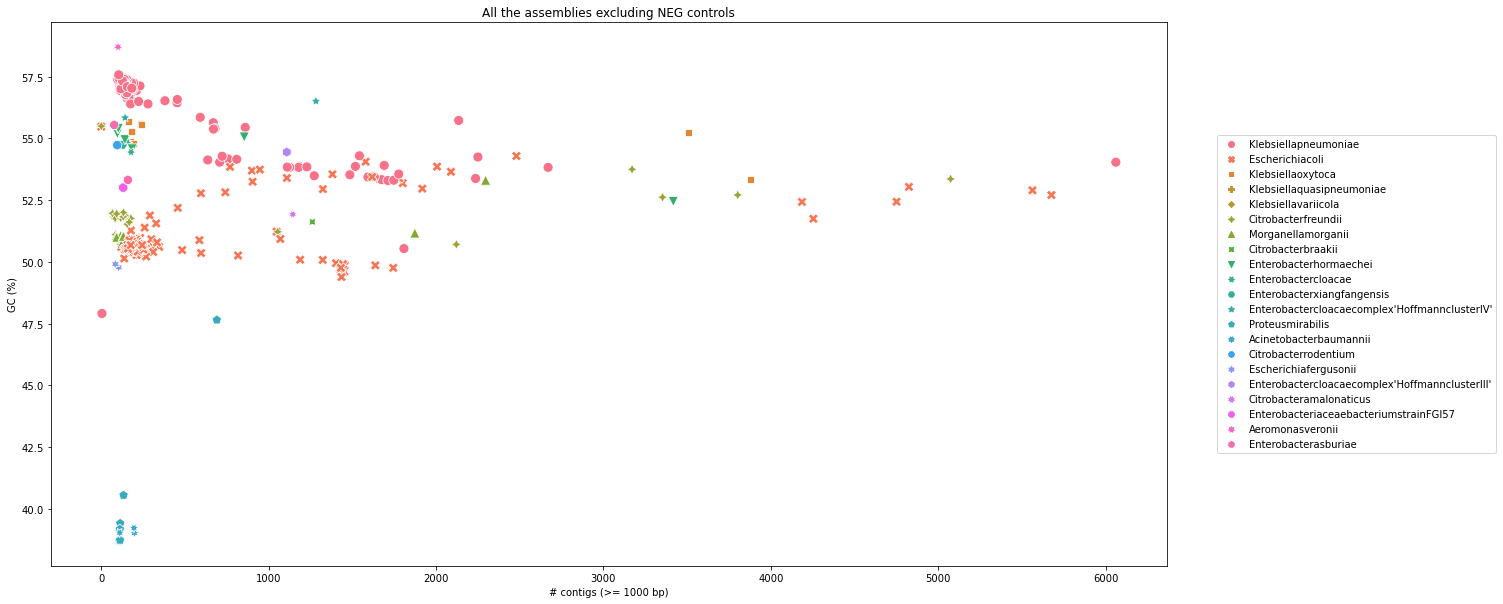

In [40]:
plt.rcParams['figure.figsize'] = [20, 10]
#ax1 = QC_MLST_CARD_Kraken_assembly_multiqc_summary_without_negative.plot.scatter(x = '# contigs', y = 'Total length (>= 0 bp)', hue='Species')
g = sns.scatterplot(data=QC_summary_without_negative, x='# contigs (>= 1000 bp)', y='GC (%)', hue='Species', s=100, style='Species')
g.legend(loc='right', bbox_to_anchor=(1.30, 0.5), ncol=1)
plt.title('All the assemblies excluding NEG controls')

#### Assembly Length vs GC%

Text(0.5, 1.0, 'All the assemblies excluding NEG controls - GC% vs Assembly length')

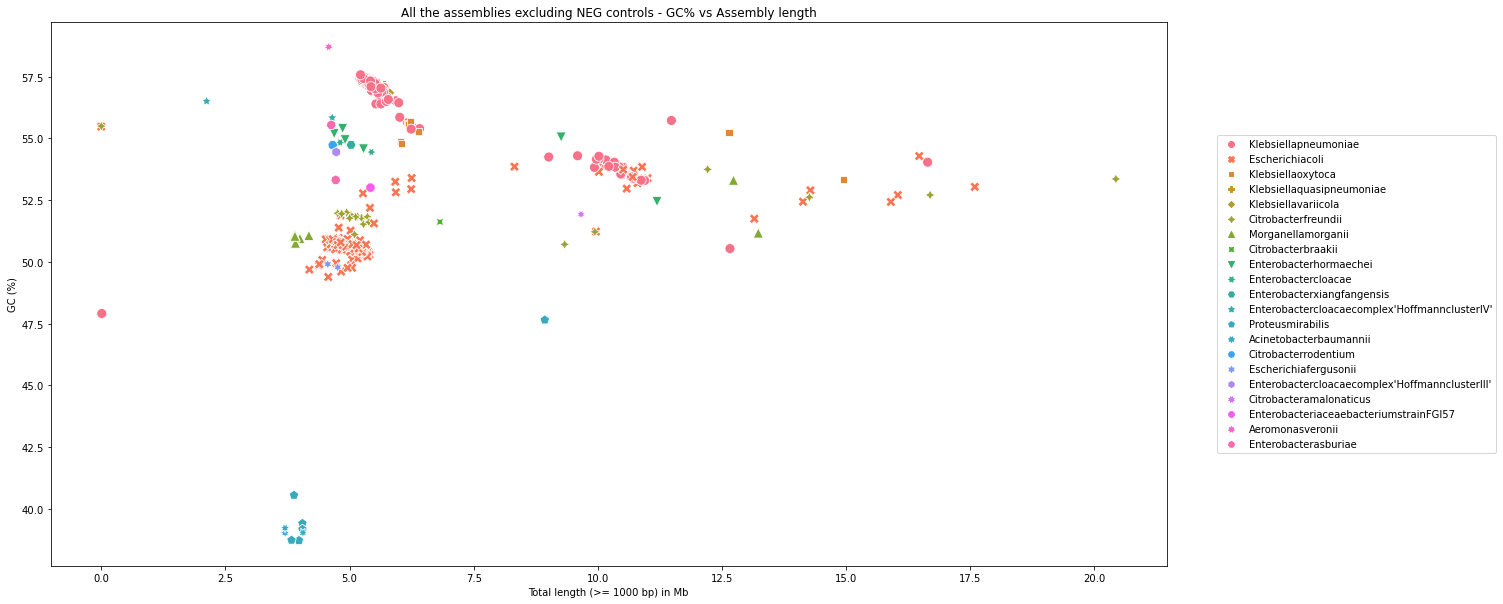

In [41]:
plt.rcParams['figure.figsize'] = [20, 10]
#ax1 = QC_MLST_CARD_Kraken_assembly_multiqc_summary_without_negative.plot.scatter(x = '# contigs', y = 'Total length (>= 0 bp)', hue='Species')
g = sns.scatterplot(data=QC_summary_without_negative, x='Total length (>= 1000 bp)', y='GC (%)', hue='Species', s=100, style='Species')
g.legend(loc='right', bbox_to_anchor=(1.30, 0.5), ncol=1)
g.set_xlabel("Total length (>= 1000 bp) in Mb")
plt.title('All the assemblies excluding NEG controls - GC% vs Assembly length')

In [42]:
len(QC_summary_without_negative[QC_summary_without_negative['Percentage of reads for Secondary Species'] > 1])

124

In [43]:
len(QC_summary_without_negative[QC_summary_without_negative['Percentage of reads for Secondary Species'] < 1])

321

In [44]:
QC_summary_without_negative_greater_than_1perc = QC_summary_without_negative[QC_summary_without_negative['Percentage of reads for Secondary Species'] > 1]

In [45]:
QC_summary_without_negative_less_than_1perc = QC_summary_without_negative[QC_summary_without_negative['Percentage of reads for Secondary Species'] < 1]

##### 0.0.1.9.2. Samples with >1% Secondary Species assignment

In [46]:
len(QC_summary_without_negative_greater_than_1perc[QC_summary_without_negative_greater_than_1perc['Total length (>= 1000 bp)'] > 6])

70

#### GC% vs Assembly length

Text(0.5, 1.0, 'Samples with >1% Secondary Species assignment')

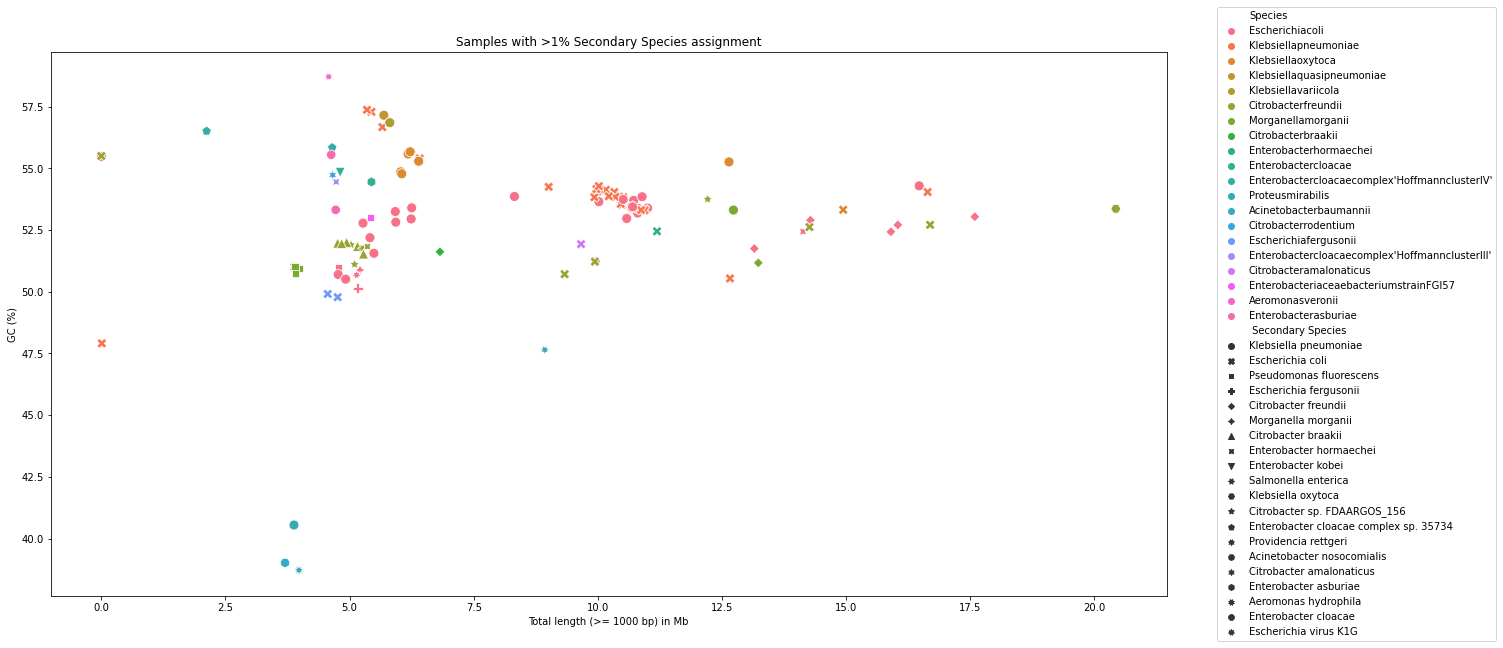

In [47]:
plt.rcParams['figure.figsize'] = [20, 10]
#ax1 = QC_MLST_CARD_Kraken_assembly_multiqc_summary_without_negative.plot.scatter(x = '# contigs', y = 'Total length (>= 0 bp)', hue='Species')
g = sns.scatterplot(data=QC_summary_without_negative_greater_than_1perc, x='Total length (>= 1000 bp)', y='GC (%)', hue='Species', s=100, style=' Secondary Species')
g.legend(loc='right', bbox_to_anchor=(1.30, 0.5), ncol=1)
g.set_xlabel("Total length (>= 1000 bp) in Mb")
plt.title('Samples with >1% Secondary Species assignment')

Text(0.5, 1.0, 'Samples with >1% Secondary Species assignment')

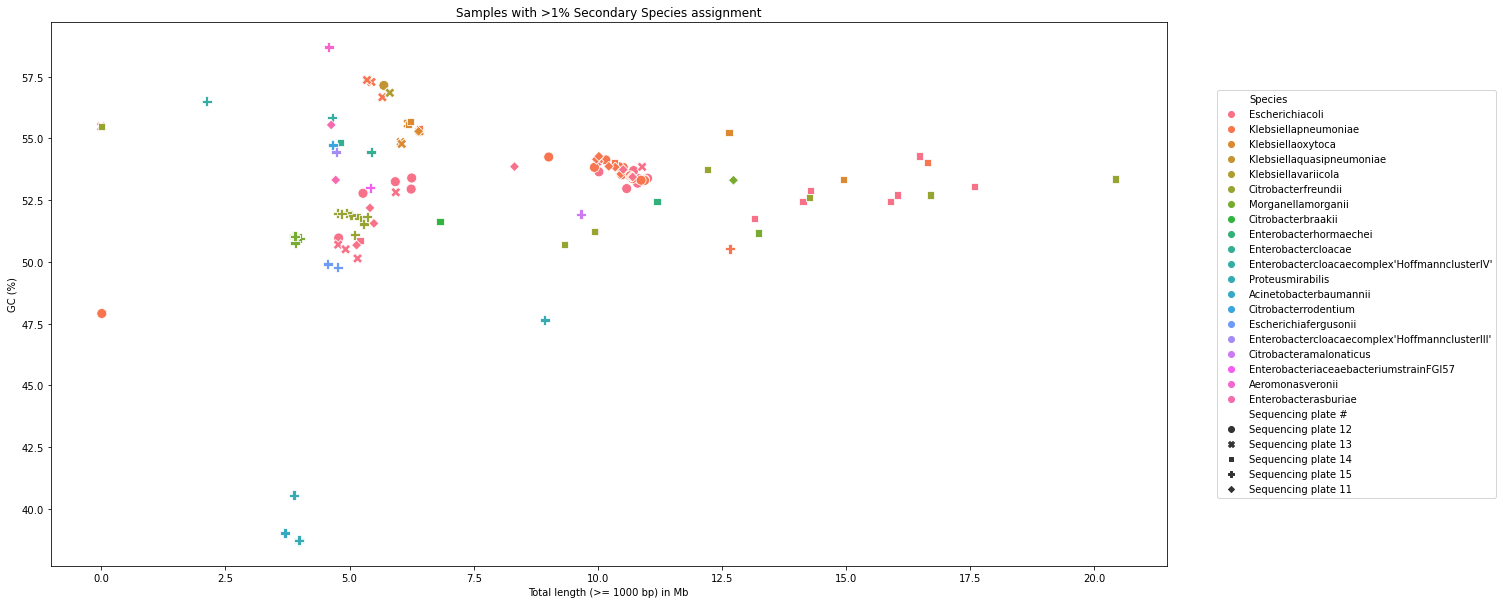

In [48]:
plt.rcParams['figure.figsize'] = [20, 10]
#ax1 = QC_MLST_CARD_Kraken_assembly_multiqc_summary_without_negative.plot.scatter(x = '# contigs', y = 'Total length (>= 0 bp)', hue='Species')
g = sns.scatterplot(data=QC_summary_without_negative_greater_than_1perc, x='Total length (>= 1000 bp)', y='GC (%)', hue='Species', s=100, style='Sequencing plate #')
g.legend(loc='right', bbox_to_anchor=(1.30, 0.5), ncol=1)
g.set_xlabel("Total length (>= 1000 bp) in Mb")
plt.title('Samples with >1% Secondary Species assignment')

#### PercentageofreadsforSpecies vs Percentage of reads for Secondary Species

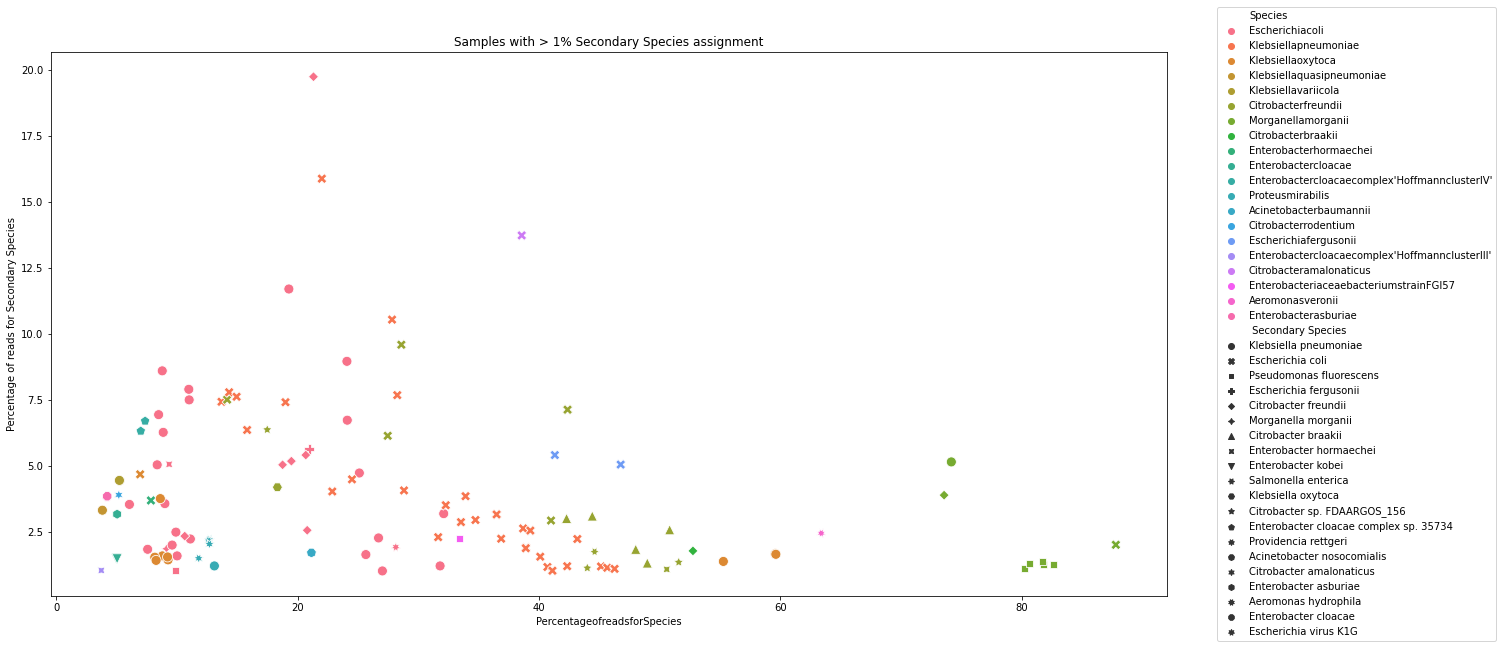

In [49]:
plt.rcParams['figure.figsize'] = [20, 10]
#ax1 = QC_MLST_CARD_Kraken_assembly_multiqc_summary_without_negative.plot.scatter(x = '# contigs', y = 'Total length (>= 0 bp)', hue='Species')
g = sns.scatterplot(data=QC_summary_without_negative_greater_than_1perc, x='PercentageofreadsforSpecies', y='Percentage of reads for Secondary Species', hue='Species', s=100, style=' Secondary Species')
g.legend(loc='right', bbox_to_anchor=(1.30, 0.5), ncol=1)
plt.title('Samples with > 1% Secondary Species assignment')
plt.show()

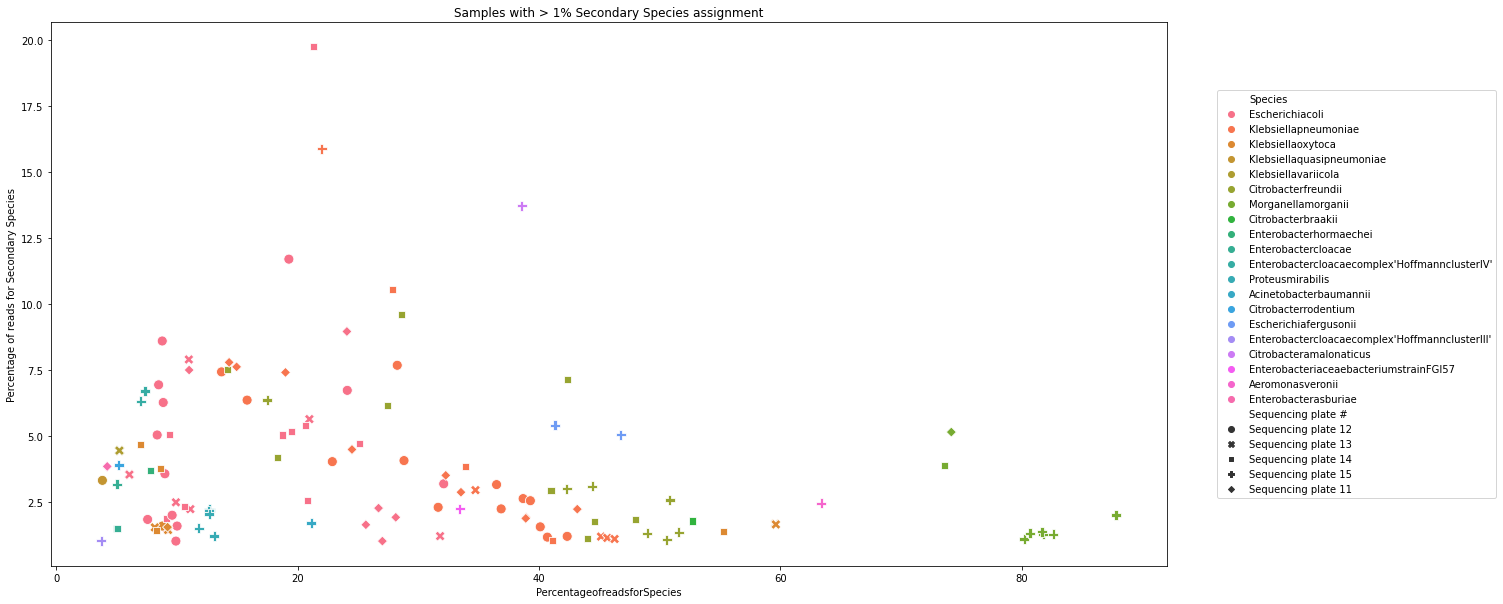

In [50]:
plt.rcParams['figure.figsize'] = [20, 10]
#ax1 = QC_MLST_CARD_Kraken_assembly_multiqc_summary_without_negative.plot.scatter(x = '# contigs', y = 'Total length (>= 0 bp)', hue='Species')
g = sns.scatterplot(data=QC_summary_without_negative_greater_than_1perc, x='PercentageofreadsforSpecies', y='Percentage of reads for Secondary Species', hue='Species', s=100, style='Sequencing plate #')
g.legend(loc='right', bbox_to_anchor=(1.30, 0.5), ncol=1)
plt.title('Samples with > 1% Secondary Species assignment')
plt.show()

##### Samples with <1% Secondary Species assignment

#### GC% vs Assembly length

Text(0.5, 1.0, 'Samples with <1% Secondary Species assignment')

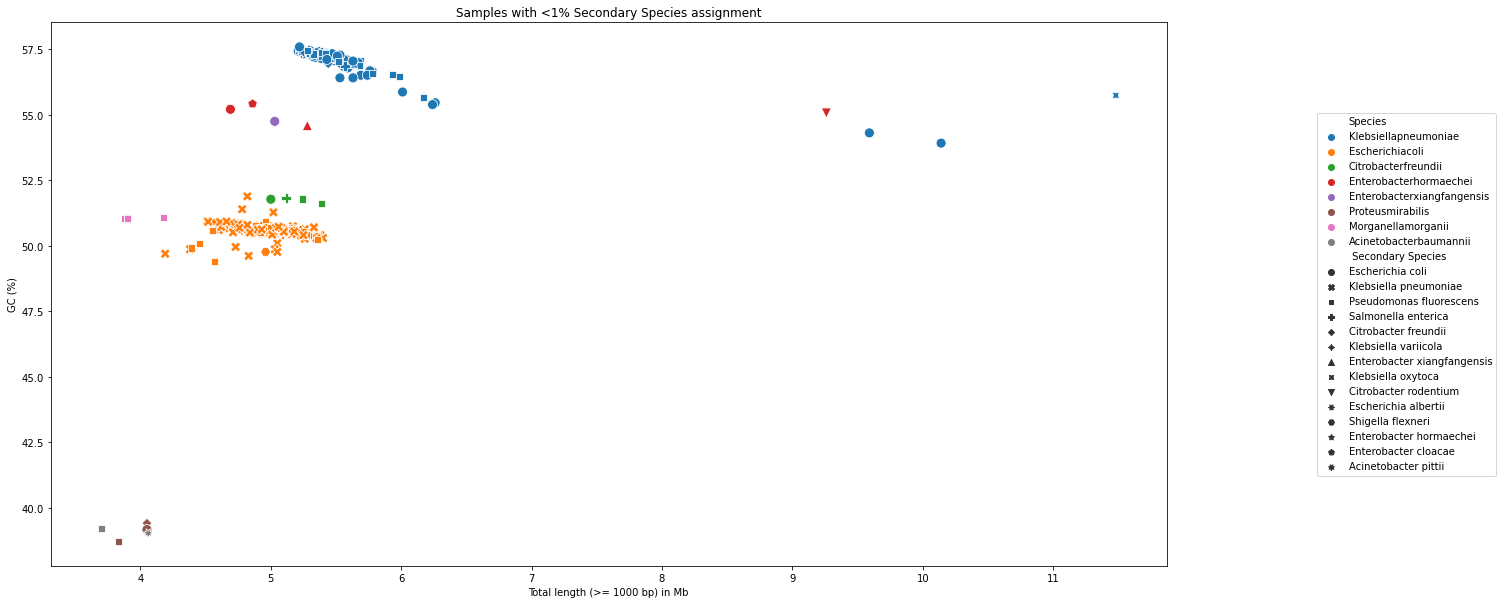

In [51]:
plt.rcParams['figure.figsize'] = [20, 10]
#ax1 = QC_MLST_CARD_Kraken_assembly_multiqc_summary_without_negative.plot.scatter(x = '# contigs', y = 'Total length (>= 0 bp)', hue='Species')
g = sns.scatterplot(data=QC_summary_without_negative_less_than_1perc, x='Total length (>= 1000 bp)', y='GC (%)', hue='Species', s=100, style=' Secondary Species')
g.legend(loc='right', bbox_to_anchor=(1.30, 0.5), ncol=1)
g.set_xlabel("Total length (>= 1000 bp) in Mb")
plt.title('Samples with <1% Secondary Species assignment')

Text(0.5, 1.0, 'Samples with <1% Secondary Species assignment')

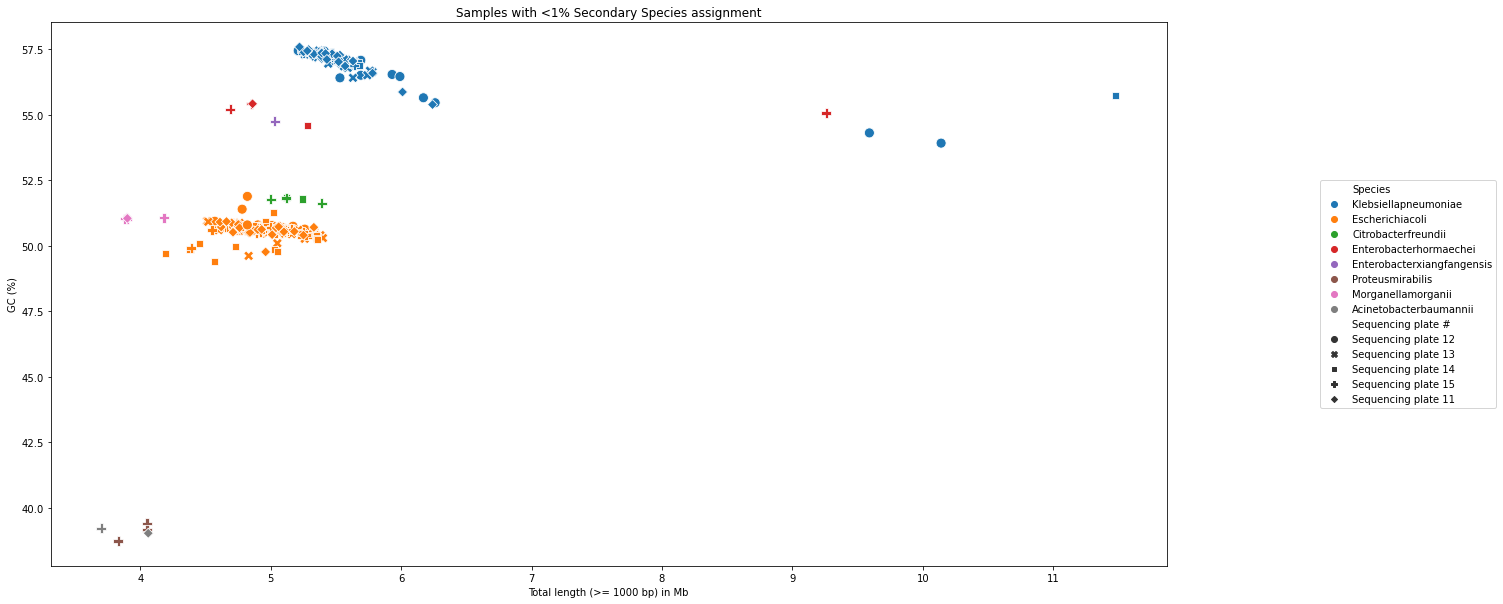

In [52]:
plt.rcParams['figure.figsize'] = [20, 10]
#ax1 = QC_MLST_CARD_Kraken_assembly_multiqc_summary_without_negative.plot.scatter(x = '# contigs', y = 'Total length (>= 0 bp)', hue='Species')
g = sns.scatterplot(data=QC_summary_without_negative_less_than_1perc, x='Total length (>= 1000 bp)', y='GC (%)', hue='Species', s=100, style='Sequencing plate #')
g.legend(loc='right', bbox_to_anchor=(1.30, 0.5), ncol=1)
g.set_xlabel("Total length (>= 1000 bp) in Mb")
plt.title('Samples with <1% Secondary Species assignment')

Text(0.5, 1.0, 'Samples with < 1% Secondary Species assignment')

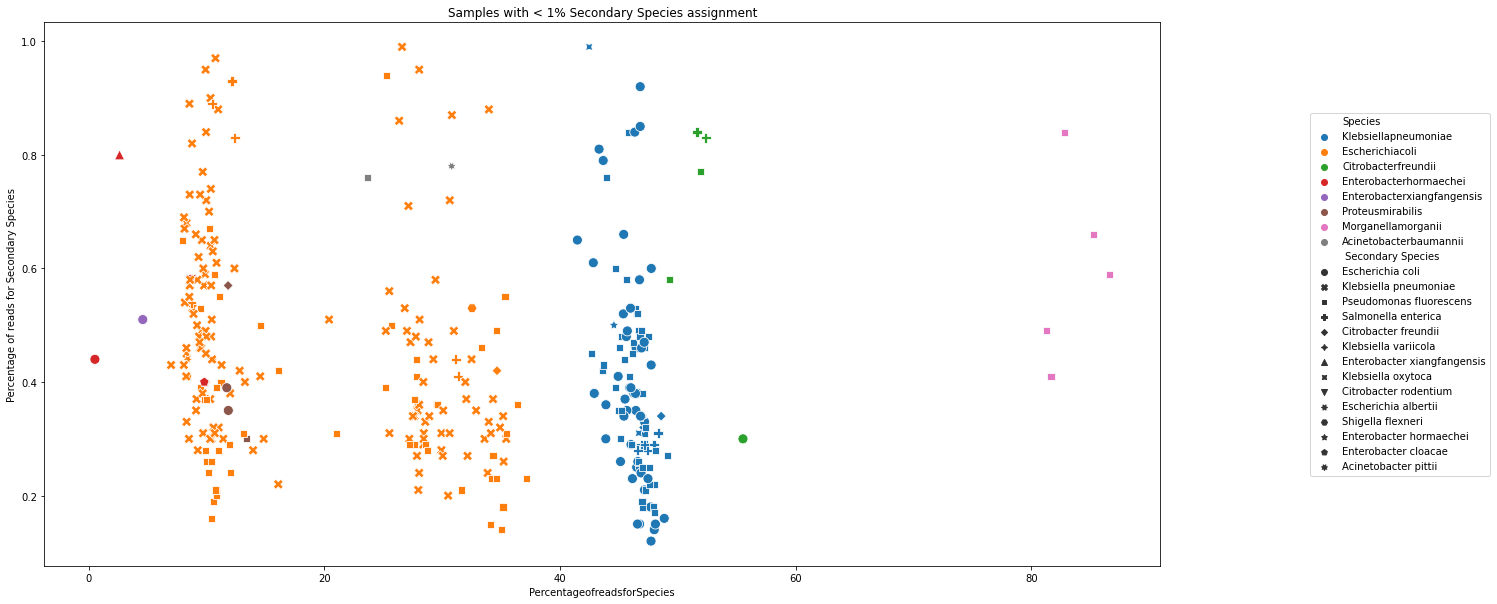

In [53]:
plt.rcParams['figure.figsize'] = [20, 10]
#ax1 = QC_MLST_CARD_Kraken_assembly_multiqc_summary_without_negative.plot.scatter(x = '# contigs', y = 'Total length (>= 0 bp)', hue='Species')
g = sns.scatterplot(data=QC_summary_without_negative_less_than_1perc, x='PercentageofreadsforSpecies', y='Percentage of reads for Secondary Species', hue='Species', s=100, style=' Secondary Species')
g.legend(loc='right', bbox_to_anchor=(1.30, 0.5), ncol=1)
plt.title('Samples with < 1% Secondary Species assignment')

Text(0.5, 1.0, 'Samples with < 1% Secondary Species assignment')

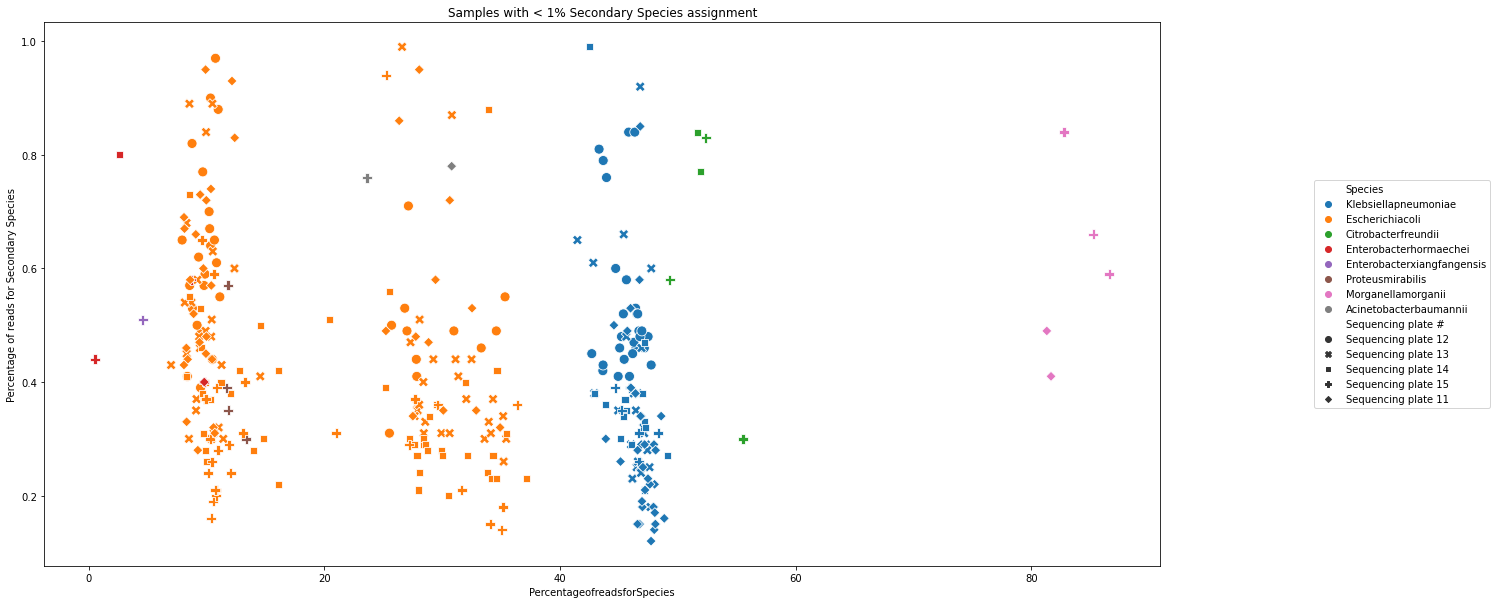

In [54]:
plt.rcParams['figure.figsize'] = [20, 10]
#ax1 = QC_MLST_CARD_Kraken_assembly_multiqc_summary_without_negative.plot.scatter(x = '# contigs', y = 'Total length (>= 0 bp)', hue='Species')
g = sns.scatterplot(data=QC_summary_without_negative_less_than_1perc, x='PercentageofreadsforSpecies', y='Percentage of reads for Secondary Species', hue='Species', s=100, style='Sequencing plate #')
g.legend(loc='right', bbox_to_anchor=(1.30, 0.5), ncol=1)
plt.title('Samples with < 1% Secondary Species assignment')

##### Explore QC metrics with Sequencing plate

In [55]:
#QC_summary_without_negative.groupby(by = "name").mean().plot(kind = "bar")
QC_summary_without_negative_plate11 = QC_summary_without_negative.loc[QC_summary_without_negative['Sequencing plate #'] == "Sequencing plate 11"]
QC_summary_without_negative_plate12 = QC_summary_without_negative.loc[QC_summary_without_negative['Sequencing plate #'] == "Sequencing plate 12"]
QC_summary_without_negative_plate13 = QC_summary_without_negative.loc[QC_summary_without_negative['Sequencing plate #'] == "Sequencing plate 13"]
QC_summary_without_negativeplate14 = QC_summary_without_negative.loc[QC_summary_without_negative['Sequencing plate #'] == "Sequencing plate 14"]
QC_summary_without_negative_plate15 = QC_summary_without_negative.loc[QC_summary_without_negative['Sequencing plate #'] == "Sequencing plate 15"]



In [56]:
dfg = QC_summary_without_negative.groupby(['Sequencing plate #'])['# contigs (>= 1000 bp)'].mean()

<AxesSubplot:title={'center':'Mean # contigs (>= 1000 bp) grouped by Sequencing Plate'}, xlabel='Sequencing Plate #', ylabel='Mean Mean # contigs (>= 1000 bp)'>

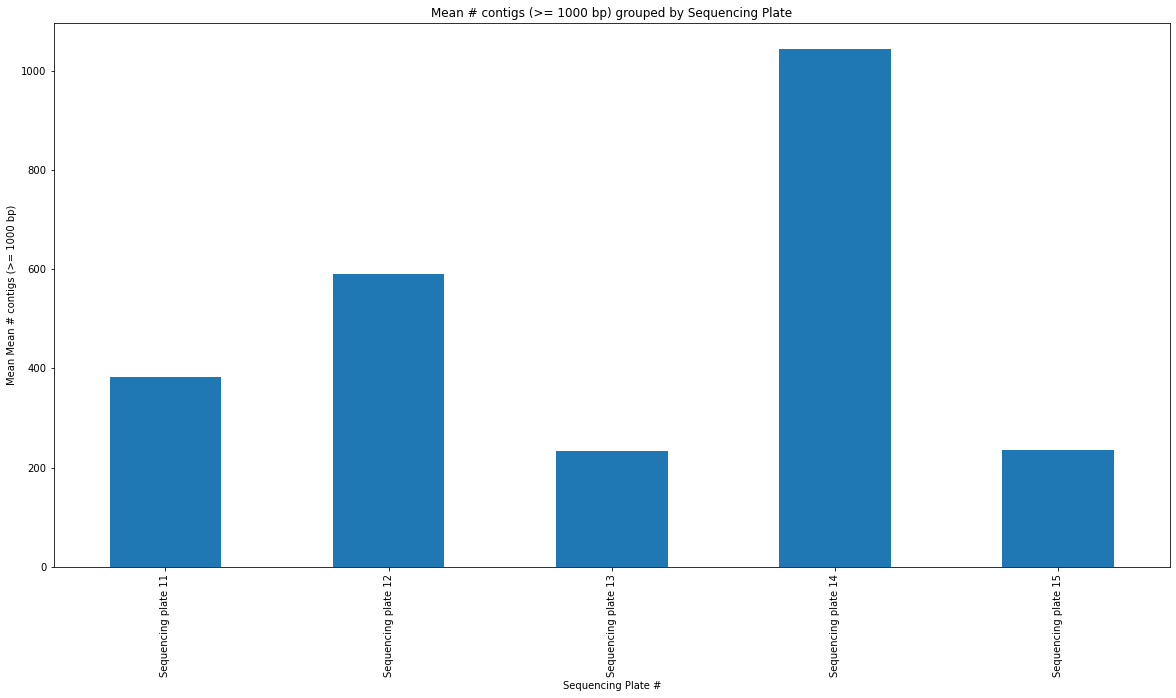

In [57]:
dfg.plot(kind='bar', title='Mean # contigs (>= 1000 bp) grouped by Sequencing Plate', ylabel='Mean Mean # contigs (>= 1000 bp)',
         xlabel='Sequencing Plate #', figsize=(20, 10))

<AxesSubplot:title={'center':'Mean Total length (>= 1000 bp) grouped by Sequencing Plate'}, xlabel='Sequencing Plate #', ylabel='Mean Total length (>= 1000 bp)'>

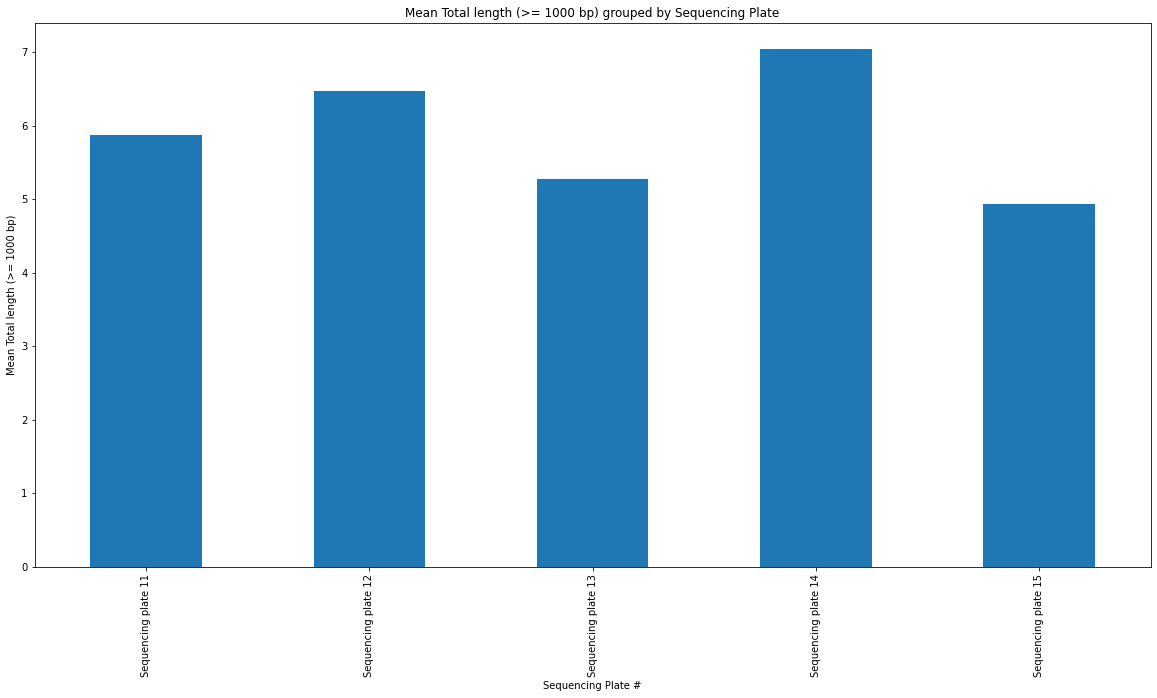

In [58]:
dfg = QC_summary_without_negative.groupby(['Sequencing plate #'])['Total length (>= 1000 bp)'].mean()
dfg.plot(kind='bar', title='Mean Total length (>= 1000 bp) grouped by Sequencing Plate', ylabel='Mean Total length (>= 1000 bp)',
         xlabel='Sequencing Plate #', figsize=(20, 10))

<AxesSubplot:title={'center':'Mean Total length (>= 1000 bp) grouped by Sequencing Plate well location'}, xlabel='Sequencing Plate well location', ylabel='Mean Total length (>= 1000 bp)'>

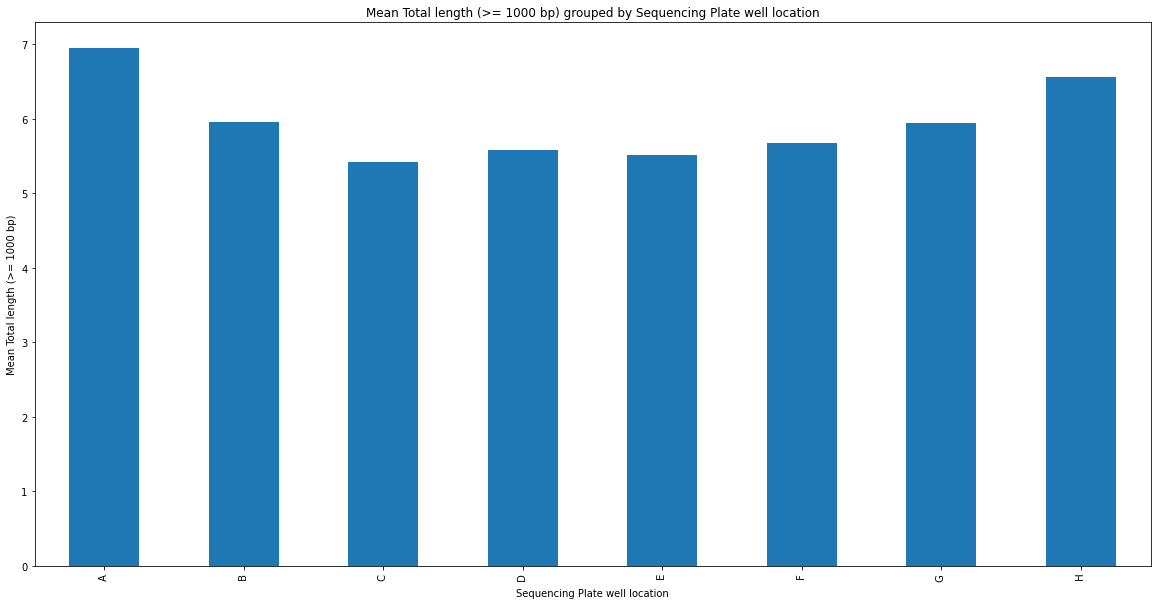

In [59]:
dfg = QC_summary_without_negative.groupby(['Sequencing plate well location'])['Total length (>= 1000 bp)'].mean()

dfg.plot(kind='bar', title='Mean Total length (>= 1000 bp) grouped by Sequencing Plate well location', ylabel='Mean Total length (>= 1000 bp)',
         xlabel='Sequencing Plate well location', figsize=(20, 10))

<AxesSubplot:title={'center':'Mean # contigs (>= 1000 bp) grouped by Sequencing Plate well cell #'}, xlabel='Sequencing Plate well #', ylabel='Mean Mean # contigs (>= 1000 bp)'>

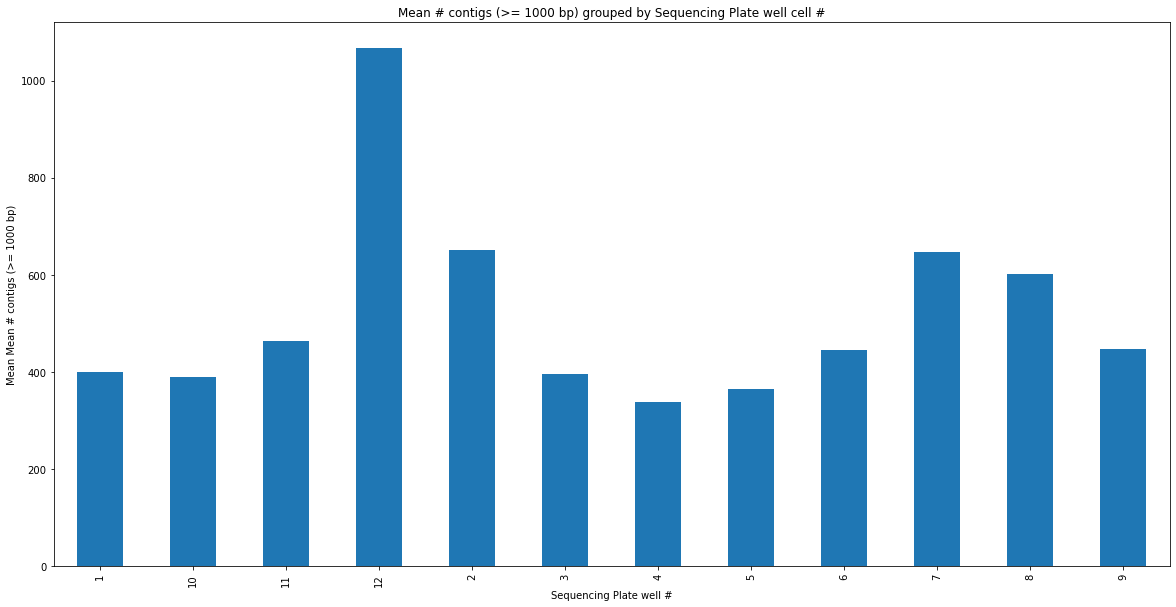

In [60]:
dfg = QC_summary_without_negative.groupby(['Sequencing plate well cell #'])['# contigs (>= 1000 bp)'].mean()
dfg.plot(kind='bar', title='Mean # contigs (>= 1000 bp) grouped by Sequencing Plate well cell #', ylabel='Mean Mean # contigs (>= 1000 bp)',
         xlabel='Sequencing Plate well #', figsize=(20, 10))

<AxesSubplot:title={'center':'Mean # contigs (>= 1000 bp) grouped by Sequencing Plate well cell #'}, xlabel='Sequencing Plate well cell #', ylabel='Total length (>= 1000 bp)'>

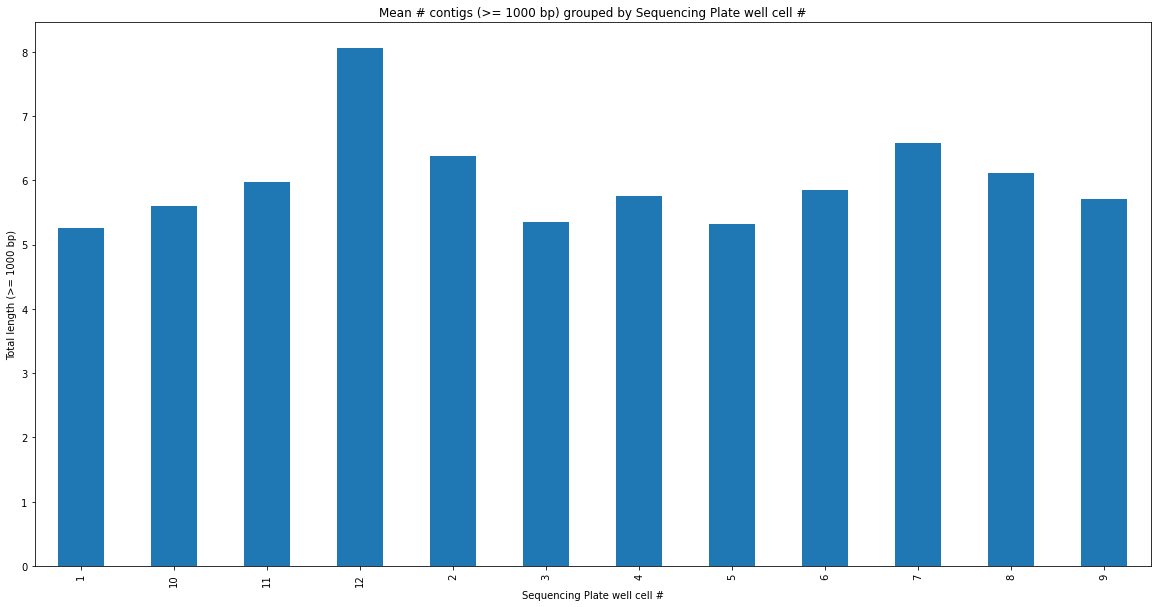

In [61]:
dfg = QC_summary_without_negative.groupby(['Sequencing plate well cell #'])['Total length (>= 1000 bp)'].mean()
dfg.plot(kind='bar', title='Mean # contigs (>= 1000 bp) grouped by Sequencing Plate well cell #', ylabel='Total length (>= 1000 bp)',
         xlabel='Sequencing Plate well cell #', figsize=(20, 10))

<AxesSubplot:title={'center':'Mean # contigs (>= 1000 bp) grouped by Sequencing Plate well cell #'}, xlabel='Sequencing Plate well', ylabel='Mean Mean # contigs (>= 1000 bp)'>

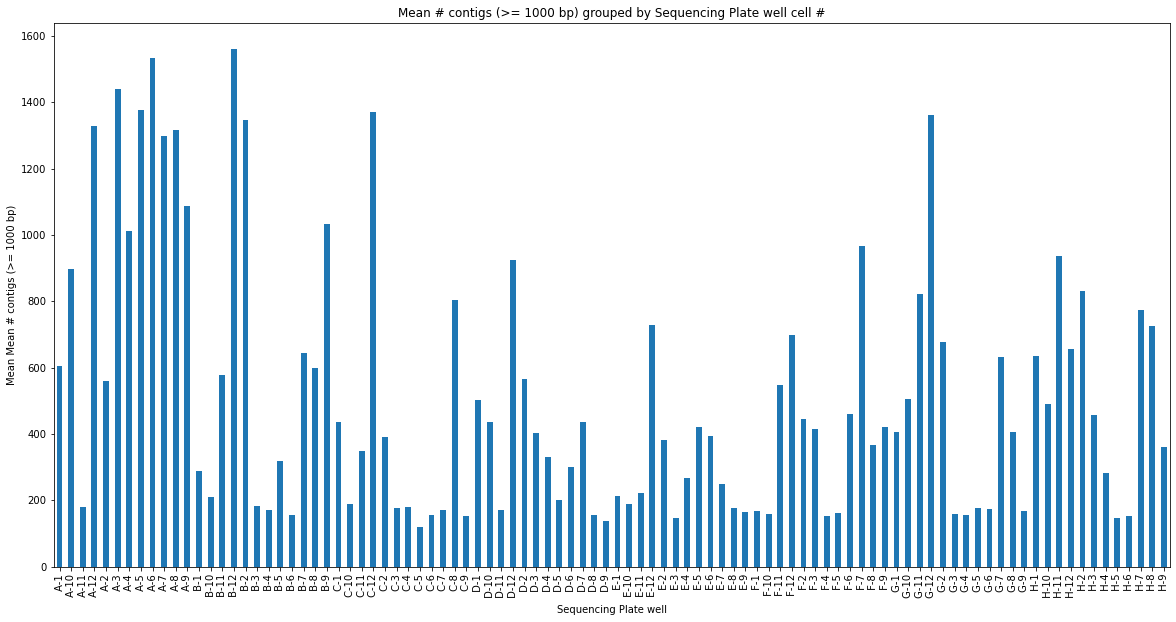

In [62]:
dfg = QC_summary_without_negative.groupby(['Sequencing plate well'])['# contigs (>= 1000 bp)'].mean()

dfg.plot(kind='bar', title='Mean # contigs (>= 1000 bp) grouped by Sequencing Plate well cell #', ylabel='Mean Mean # contigs (>= 1000 bp)',
         xlabel='Sequencing Plate well', figsize=(20, 10))

<AxesSubplot:title={'center':'Mean Total length (>= 1000 bp) grouped by Sequencing Plate well cell #'}, xlabel='Sequencing Plate well', ylabel='Mean Total length (>= 1000 bp)'>

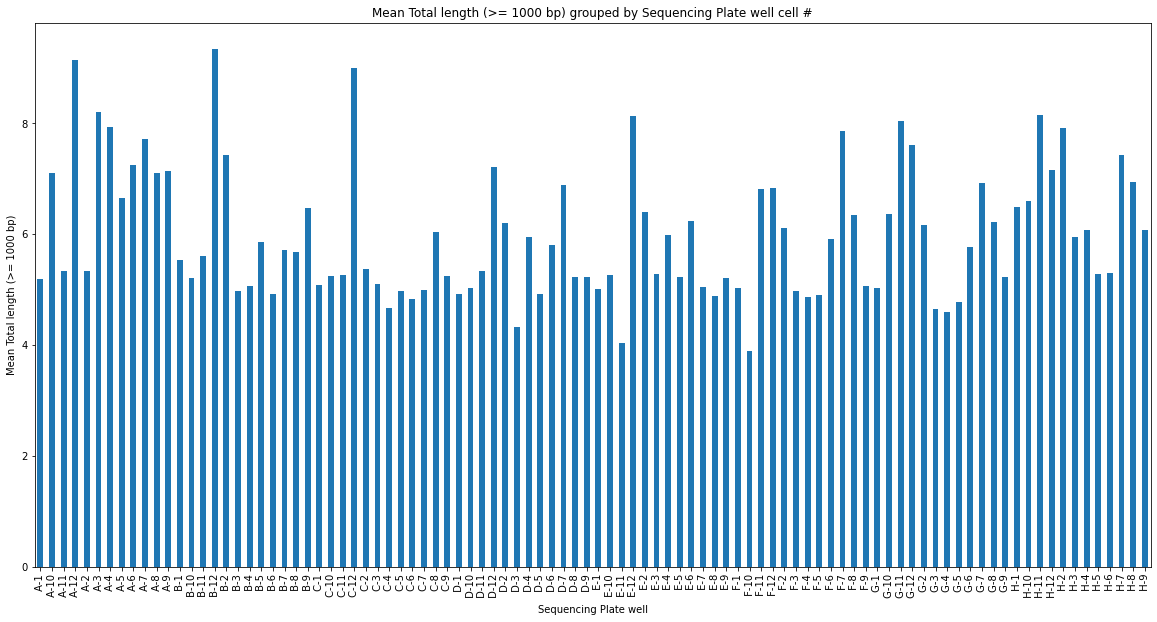

In [63]:
dfg = QC_summary_without_negative.groupby(['Sequencing plate well'])['Total length (>= 1000 bp)'].mean()

dfg.plot(kind='bar', title='Mean Total length (>= 1000 bp) grouped by Sequencing Plate well cell #', ylabel='Mean Total length (>= 1000 bp)',
         xlabel='Sequencing Plate well', figsize=(20, 10))

In [ ]:
QC_summary_without_negative.rename(columns = {'Sequencing_plate_well_cell_#':'Sequencing_plate_well_cell'}, inplace = True)
QC_summary_without_negative.Sequencing_plate_well_cell = QC_summary_without_negative.Sequencing_plate_well_cell.astype(float)
QC_summary_without_negative.sort_values(by=['Sequencing plate well location', 'Sequencing_plate_well_cell'], ascending=True)

In [75]:
QC_summary_without_negative.columns

Index(['Sample_name', 'Total_reads', 'Total_bp', 'MeanReadLength', 'Coverage',
       '# of AMR genes detected by ARIBA', 'PercentageofreadsforSpecies',
       '#ofreadsforSpecies', 'Species',
       'Percentage of reads for Secondary Species',
       '# of reads for Secondary Species', ' Secondary Species',
       'adapter_content_x', 'Sequences flagged as poor quality_x',
       'sequence_duplication_levels_x', 'avg_sequence_length_x', 'Encoding_x',
       'per_base_sequence_quality_x', 'sequence_length_distribution_x',
       'Sequence length_x', 'File type_x', 'basic_statistics_x',
       'per_sequence_gc_content_x', 'Total Sequences_x',
       'per_base_n_content_x', 'per_base_sequence_content_x',
       'overrepresented_sequences_x', '%GC_x',
       'total_deduplicated_percentage_x', 'Filename_x',
       'per_tile_sequence_quality_x', 'per_sequence_quality_scores_x',
       'adapter_content_y', 'Sequences flagged as poor quality_y',
       'sequence_duplication_levels_y', 'avg_se

In [77]:

QC_summary_without_negative_pivot = QC_summary_without_negative.pivot(index = 'Sequencing plate #', columns = ['Sequencing plate well location', 'Sequencing_plate_well_cell'],values= 'Total length (>= 1000 bp)' ) 

In [ ]:
QC_summary_without_negative_pivot.T

In [81]:
QC_summary_without_negative_plate11 = QC_summary_without_negative.loc[QC_summary_without_negative['Sequencing plate #'] == "Sequencing plate 11"]
QC_summary_without_negative_plate12 = QC_summary_without_negative.loc[QC_summary_without_negative['Sequencing plate #'] == "Sequencing plate 12"]
QC_summary_without_negative_plate13 = QC_summary_without_negative.loc[QC_summary_without_negative['Sequencing plate #'] == "Sequencing plate 13"]
QC_summary_without_negative_plate14 = QC_summary_without_negative.loc[QC_summary_without_negative['Sequencing plate #'] == "Sequencing plate 14"]
QC_summary_without_negative_plate15 = QC_summary_without_negative.loc[QC_summary_without_negative['Sequencing plate #'] == "Sequencing plate 15"]


In [110]:
#QC_summary_without_negative_plate11

QC_summary_without_negative_plate11_pivot_length = QC_summary_without_negative_plate11.pivot(index = 'Sequencing plate well location', columns = 'Sequencing_plate_well_cell', values= 'Total length (>= 1000 bp)' )
QC_summary_without_negative_plate12_pivot_length = QC_summary_without_negative_plate12.pivot(index = 'Sequencing plate well location', columns = 'Sequencing_plate_well_cell', values= 'Total length (>= 1000 bp)' ) 
QC_summary_without_negative_plate13_pivot_length = QC_summary_without_negative_plate13.pivot(index = 'Sequencing plate well location', columns = 'Sequencing_plate_well_cell', values= 'Total length (>= 1000 bp)' ) 
QC_summary_without_negative_plate14_pivot_length = QC_summary_without_negative_plate14.pivot(index = 'Sequencing plate well location', columns = 'Sequencing_plate_well_cell', values= 'Total length (>= 1000 bp)' ) 
QC_summary_without_negative_plate15_pivot_length = QC_summary_without_negative_plate15.pivot(index = 'Sequencing plate well location', columns = 'Sequencing_plate_well_cell', values= 'Total length (>= 1000 bp)' ) 

In [161]:
#QC_summary_without_negative_plate11

QC_summary_without_negative_plate11_pivot = QC_summary_without_negative_plate11.pivot(index = 'Sequencing plate well location', columns = 'Sequencing_plate_well_cell', values= '# contigs (>= 0 bp)' )
QC_summary_without_negative_plate12_pivot = QC_summary_without_negative_plate12.pivot(index = 'Sequencing plate well location', columns = 'Sequencing_plate_well_cell', values= '# contigs (>= 0 bp)' ) 
QC_summary_without_negative_plate13_pivot = QC_summary_without_negative_plate13.pivot(index = 'Sequencing plate well location', columns = 'Sequencing_plate_well_cell', values= '# contigs (>= 0 bp)' ) 
QC_summary_without_negative_plate14_pivot = QC_summary_without_negative_plate14.pivot(index = 'Sequencing plate well location', columns = 'Sequencing_plate_well_cell', values= '# contigs (>= 0 bp)' ) 
QC_summary_without_negative_plate15_pivot = QC_summary_without_negative_plate15.pivot(index = 'Sequencing plate well location', columns = 'Sequencing_plate_well_cell', values= '# contigs (>= 0 bp)' ) 

In [130]:
#QC_summary_without_negative_plate11

QC_summary_without_negative_plate11_pivot_perc_of_reads_for_secondary = QC_summary_without_negative_plate11.pivot(index = 'Sequencing plate well location', columns = 'Sequencing_plate_well_cell', values= 'Percentage of reads for Secondary Species' )
QC_summary_without_negative_plate12_pivot_perc_of_reads_for_secondary = QC_summary_without_negative_plate12.pivot(index = 'Sequencing plate well location', columns = 'Sequencing_plate_well_cell', values= 'Percentage of reads for Secondary Species' ) 
QC_summary_without_negative_plate13_pivot_perc_of_reads_for_secondary = QC_summary_without_negative_plate13.pivot(index = 'Sequencing plate well location', columns = 'Sequencing_plate_well_cell', values= 'Percentage of reads for Secondary Species' ) 
QC_summary_without_negative_plate14_pivot_perc_of_reads_for_secondary = QC_summary_without_negative_plate14.pivot(index = 'Sequencing plate well location', columns = 'Sequencing_plate_well_cell', values= 'Percentage of reads for Secondary Species' ) 
QC_summary_without_negative_plate15_pivot_perc_of_reads_for_secondary = QC_summary_without_negative_plate15.pivot(index = 'Sequencing plate well location', columns = 'Sequencing_plate_well_cell', values= 'Percentage of reads for Secondary Species' ) 

In [131]:
#QC_summary_without_negative_plate11

QC_summary_without_negative_plate11_pivot_gc_perc = QC_summary_without_negative_plate11.pivot(index = 'Sequencing plate well location', columns = 'Sequencing_plate_well_cell', values= '%GC_x' )
QC_summary_without_negative_plate12_pivot_gc_perc = QC_summary_without_negative_plate12.pivot(index = 'Sequencing plate well location', columns = 'Sequencing_plate_well_cell', values= '%GC_x' ) 
QC_summary_without_negative_plate13_pivot_gc_perc = QC_summary_without_negative_plate13.pivot(index = 'Sequencing plate well location', columns = 'Sequencing_plate_well_cell', values= '%GC_x' ) 
QC_summary_without_negative_plate14_pivot_gc_perc = QC_summary_without_negative_plate14.pivot(index = 'Sequencing plate well location', columns = 'Sequencing_plate_well_cell', values= '%GC_x' ) 
QC_summary_without_negative_plate15_pivot_gc_perc = QC_summary_without_negative_plate15.pivot(index = 'Sequencing plate well location', columns = 'Sequencing_plate_well_cell', values= '%GC_x' ) 

In [151]:
max(QC_summary_without_negative['%GC_x'])

58.0

Text(0.5, 1.0, 'Sequencing Plate 15')

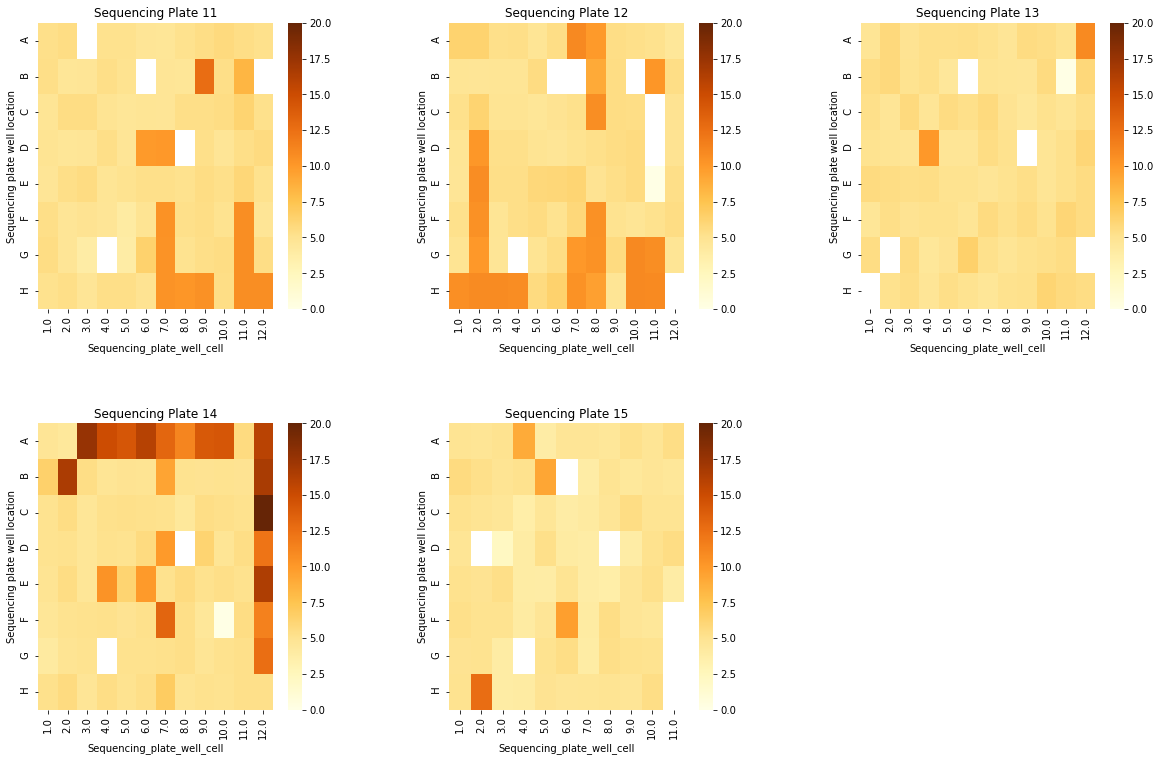

In [162]:
#QC_summary_without_negative_plate11

plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(3, 3, 1)

ax1 = sns.heatmap(QC_summary_without_negative_plate11_pivot_length, xticklabels=True, yticklabels=True, cmap='YlOrBr', ax=ax, vmin=0, vmax=20)
ax1.set_title('Sequencing Plate 11')

ax = fig.add_subplot(3, 3, 2)
ax2 = sns.heatmap(QC_summary_without_negative_plate12_pivot_length, xticklabels=True, yticklabels=True, cmap='YlOrBr', ax=ax, vmin=0, vmax=20)
ax2.set_title('Sequencing Plate 12')


ax = fig.add_subplot(3, 3, 3)
ax3 = sns.heatmap(QC_summary_without_negative_plate13_pivot_length, xticklabels=True, yticklabels=True, cmap='YlOrBr', ax=ax, vmin=0, vmax=20)
ax3.set_title('Sequencing Plate 13')



ax = fig.add_subplot(3, 3, 4)

ax4 = sns.heatmap(QC_summary_without_negative_plate14_pivot_length, xticklabels=True, yticklabels=True, cmap='YlOrBr', ax=ax, vmin=0, vmax=20)
ax4.set_title('Sequencing Plate 14')


ax = fig.add_subplot(3, 3, 5)
ax5 = sns.heatmap(QC_summary_without_negative_plate15_pivot_length, xticklabels=True, yticklabels=True, cmap='YlOrBr', ax=ax, vmin=0, vmax=20)
ax5.set_title('Sequencing Plate 15')




Text(0.5, 1.0, 'Sequencing Plate 15')

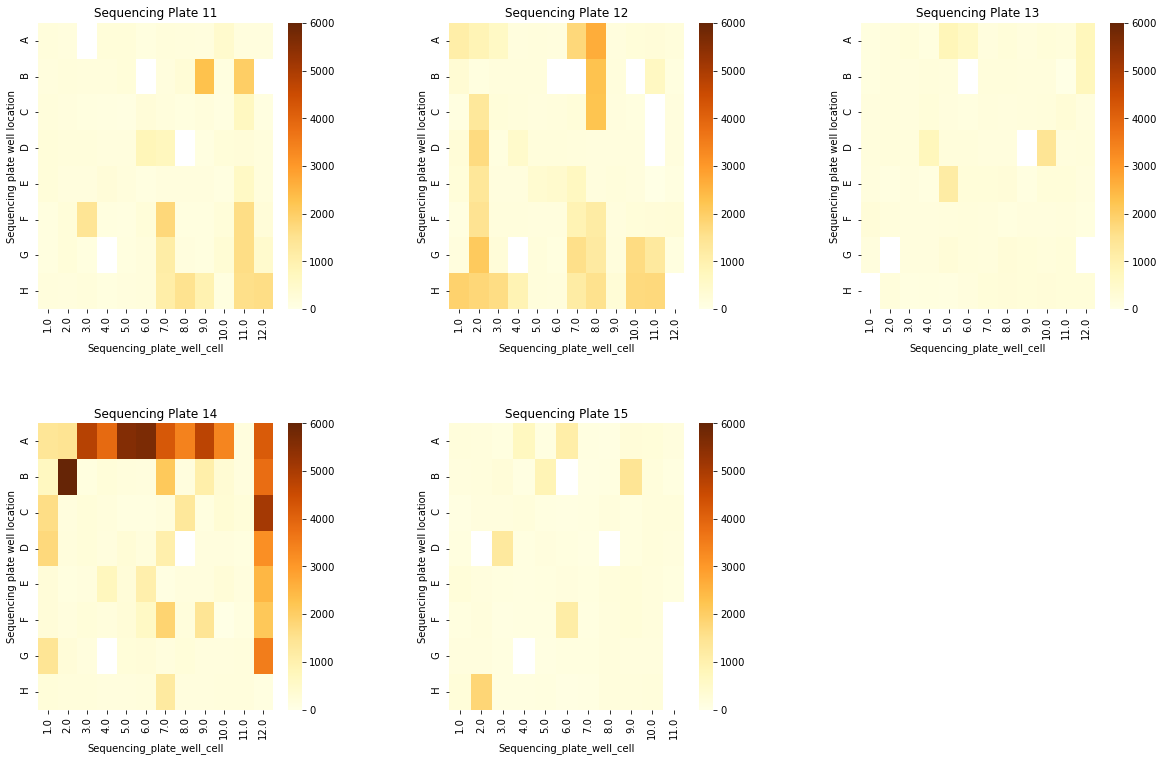

In [117]:
#QC_summary_without_negative_plate11

plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(3, 3, 1)

ax1 = sns.heatmap(QC_summary_without_negative_plate11_pivot, xticklabels=True, yticklabels=True, cmap='YlOrBr', ax=ax, vmin=0, vmax=6000)
ax1.set_title('Sequencing Plate 11')

ax = fig.add_subplot(3, 3, 2)
ax2 = sns.heatmap(QC_summary_without_negative_plate12_pivot, xticklabels=True, yticklabels=True, cmap='YlOrBr', ax=ax, vmin=0, vmax=6000)
ax2.set_title('Sequencing Plate 12')


ax = fig.add_subplot(3, 3, 3)
ax3 = sns.heatmap(QC_summary_without_negative_plate13_pivot, xticklabels=True, yticklabels=True, cmap='YlOrBr', ax=ax, vmin=0, vmax=6000)
ax3.set_title('Sequencing Plate 13')



ax = fig.add_subplot(3, 3, 4)

ax4 = sns.heatmap(QC_summary_without_negative_plate14_pivot, xticklabels=True, yticklabels=True, cmap='YlOrBr', ax=ax, vmin=0, vmax=6000)
ax4.set_title('Sequencing Plate 14')


ax = fig.add_subplot(3, 3, 5)
ax5 = sns.heatmap(QC_summary_without_negative_plate15_pivot, xticklabels=True, yticklabels=True, cmap='YlOrBr', ax=ax, vmin=0, vmax=6000)
ax5.set_title('Sequencing Plate 15')




Text(0.5, 1.0, 'Sequencing Plate 15 - GC%')

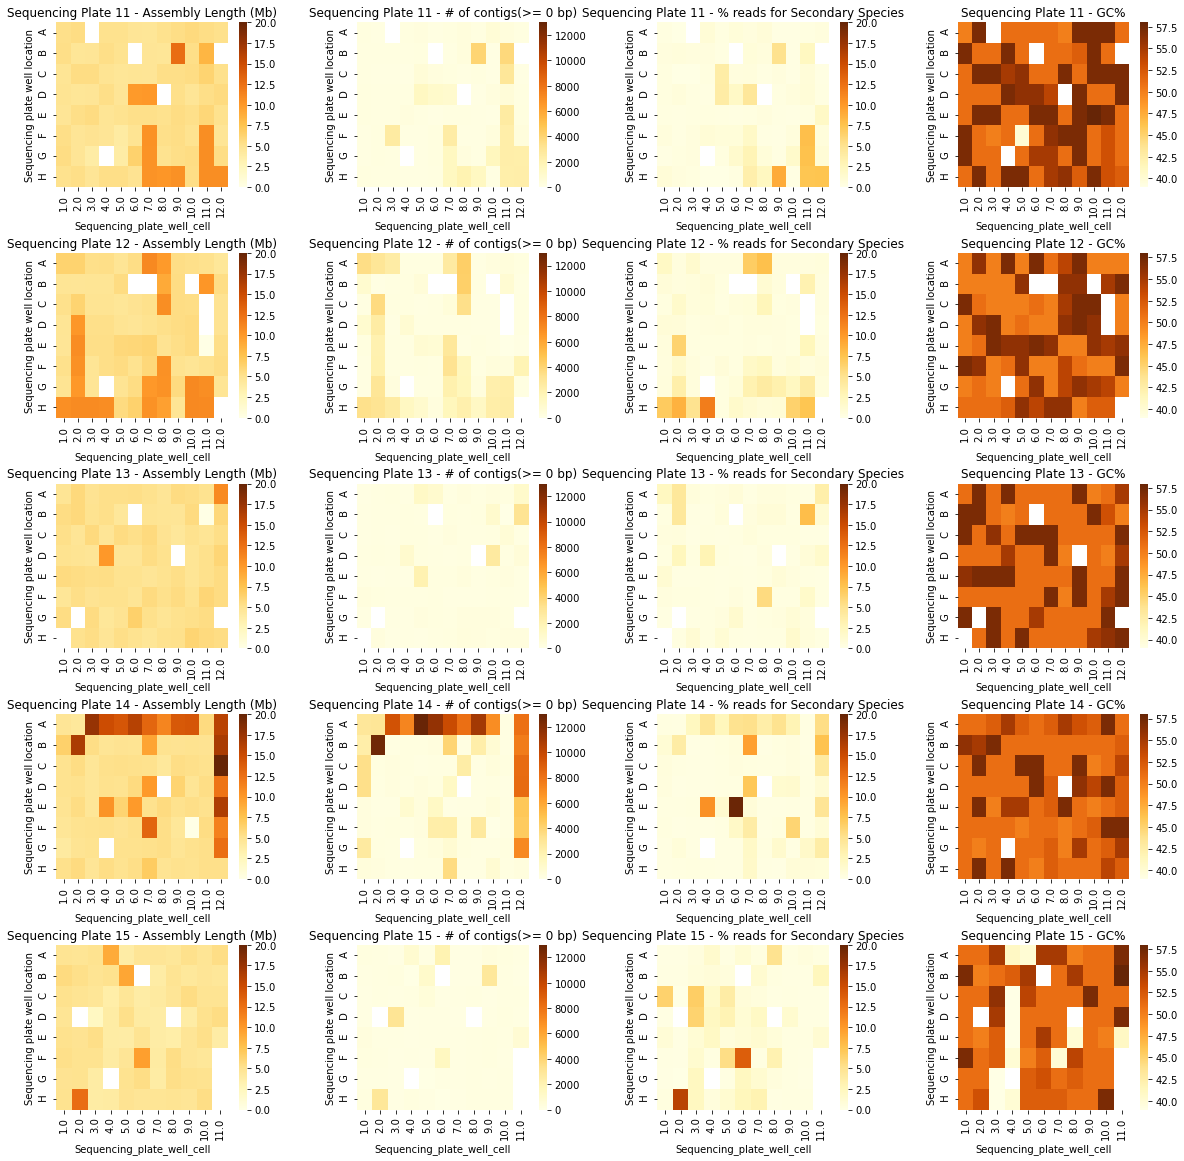

In [167]:

plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(5, 4, 1)

ax1 = sns.heatmap(QC_summary_without_negative_plate11_pivot_length, xticklabels=True, yticklabels=True, cmap='YlOrBr', ax=ax, vmin=0, vmax=20)
ax1.set_title('Sequencing Plate 11 - Assembly Length (Mb)')

ax = fig.add_subplot(5, 4, 2)

ax2 = sns.heatmap(QC_summary_without_negative_plate11_pivot, xticklabels=True, yticklabels=True, cmap='YlOrBr', ax=ax, vmin=0, vmax=13000)
ax2.set_title('Sequencing Plate 11 - # of contigs(>= 0 bp)')

ax = fig.add_subplot(5, 4, 3)

ax3 = sns.heatmap(QC_summary_without_negative_plate11_pivot_perc_of_reads_for_secondary, xticklabels=True, yticklabels=True, cmap='YlOrBr', ax=ax, vmin=0, vmax=20)
ax3.set_title('Sequencing Plate 11 - % reads for Secondary Species')


ax = fig.add_subplot(5, 4, 4)

ax4 = sns.heatmap(QC_summary_without_negative_plate11_pivot_gc_perc, xticklabels=True, yticklabels=True, cmap='YlOrBr', ax=ax, vmin=39, vmax=58)
ax4.set_title('Sequencing Plate 11 - GC%')

ax = fig.add_subplot(5, 4, 5)

ax5 = sns.heatmap(QC_summary_without_negative_plate12_pivot_length, xticklabels=True, yticklabels=True, cmap='YlOrBr', ax=ax, vmin=0, vmax=20)
ax5.set_title('Sequencing Plate 12 - Assembly Length (Mb)')

ax = fig.add_subplot(5, 4, 6)

ax6 = sns.heatmap(QC_summary_without_negative_plate12_pivot, xticklabels=True, yticklabels=True, cmap='YlOrBr', ax=ax, vmin=0, vmax=13000)
ax6.set_title('Sequencing Plate 12 - # of contigs(>= 0 bp)')

ax = fig.add_subplot(5, 4, 7)

ax7 = sns.heatmap(QC_summary_without_negative_plate12_pivot_perc_of_reads_for_secondary, xticklabels=True, yticklabels=True, cmap='YlOrBr', ax=ax, vmin=0, vmax=20)
ax7.set_title('Sequencing Plate 12 - % reads for Secondary Species')


ax = fig.add_subplot(5, 4, 8)

ax8 = sns.heatmap(QC_summary_without_negative_plate12_pivot_gc_perc, xticklabels=True, yticklabels=True, cmap='YlOrBr', ax=ax, vmin=39, vmax=58)
ax8.set_title('Sequencing Plate 12 - GC%')

ax = fig.add_subplot(5, 4, 9)

ax9 = sns.heatmap(QC_summary_without_negative_plate13_pivot_length, xticklabels=True, yticklabels=True, cmap='YlOrBr', ax=ax, vmin=0, vmax=20)
ax9.set_title('Sequencing Plate 13 - Assembly Length (Mb)')

ax = fig.add_subplot(5, 4, 10)

ax10 = sns.heatmap(QC_summary_without_negative_plate13_pivot, xticklabels=True, yticklabels=True, cmap='YlOrBr', ax=ax, vmin=0, vmax=13000)
ax10.set_title('Sequencing Plate 13 - # of contigs(>= 0 bp)')

ax = fig.add_subplot(5, 4, 11)

ax11 = sns.heatmap(QC_summary_without_negative_plate13_pivot_perc_of_reads_for_secondary, xticklabels=True, yticklabels=True, cmap='YlOrBr', ax=ax, vmin=0, vmax=20)
ax11.set_title('Sequencing Plate 13 - % reads for Secondary Species')


ax = fig.add_subplot(5, 4, 12)

ax12 = sns.heatmap(QC_summary_without_negative_plate13_pivot_gc_perc, xticklabels=True, yticklabels=True, cmap='YlOrBr', ax=ax, vmin=39, vmax=58)
ax12.set_title('Sequencing Plate 13 - GC%')

ax = fig.add_subplot(5, 4, 13)

ax13 = sns.heatmap(QC_summary_without_negative_plate14_pivot_length, xticklabels=True, yticklabels=True, cmap='YlOrBr', ax=ax, vmin=0, vmax=20)
ax13.set_title('Sequencing Plate 14 - Assembly Length (Mb)')

ax = fig.add_subplot(5, 4, 14)

ax14 = sns.heatmap(QC_summary_without_negative_plate14_pivot, xticklabels=True, yticklabels=True, cmap='YlOrBr', ax=ax, vmin=0, vmax=13000)
ax14.set_title('Sequencing Plate 14 - # of contigs(>= 0 bp)')

ax = fig.add_subplot(5, 4, 15)

ax15 = sns.heatmap(QC_summary_without_negative_plate14_pivot_perc_of_reads_for_secondary, xticklabels=True, yticklabels=True, cmap='YlOrBr', ax=ax, vmin=0, vmax=20)
ax15.set_title('Sequencing Plate 14 - % reads for Secondary Species')


ax = fig.add_subplot(5, 4, 16)

ax16 = sns.heatmap(QC_summary_without_negative_plate14_pivot_gc_perc, xticklabels=True, yticklabels=True, cmap='YlOrBr', ax=ax, vmin=39, vmax=58)
ax16.set_title('Sequencing Plate 14 - GC%')

ax = fig.add_subplot(5, 4, 17)

ax17 = sns.heatmap(QC_summary_without_negative_plate15_pivot_length, xticklabels=True, yticklabels=True, cmap='YlOrBr', ax=ax, vmin=0, vmax=20)
ax17.set_title('Sequencing Plate 15 - Assembly Length (Mb)')

ax = fig.add_subplot(5, 4, 18)

ax18 = sns.heatmap(QC_summary_without_negative_plate15_pivot, xticklabels=True, yticklabels=True, cmap='YlOrBr', ax=ax, vmin=0, vmax=13000)
ax18.set_title('Sequencing Plate 15 - # of contigs(>= 0 bp)')

ax = fig.add_subplot(5, 4, 19)

ax19 = sns.heatmap(QC_summary_without_negative_plate15_pivot_perc_of_reads_for_secondary, xticklabels=True, yticklabels=True, cmap='YlOrBr', ax=ax, vmin=0, vmax=20)
ax19.set_title('Sequencing Plate 15 - % reads for Secondary Species')


ax = fig.add_subplot(5, 4, 20)

ax20 = sns.heatmap(QC_summary_without_negative_plate15_pivot_gc_perc, xticklabels=True, yticklabels=True, cmap='YlOrBr', ax=ax, vmin=39, vmax=58)
ax20.set_title('Sequencing Plate 15 - GC%')


Text(0.5, 1.0, 'Samples with >1% Secondary Species assignment')

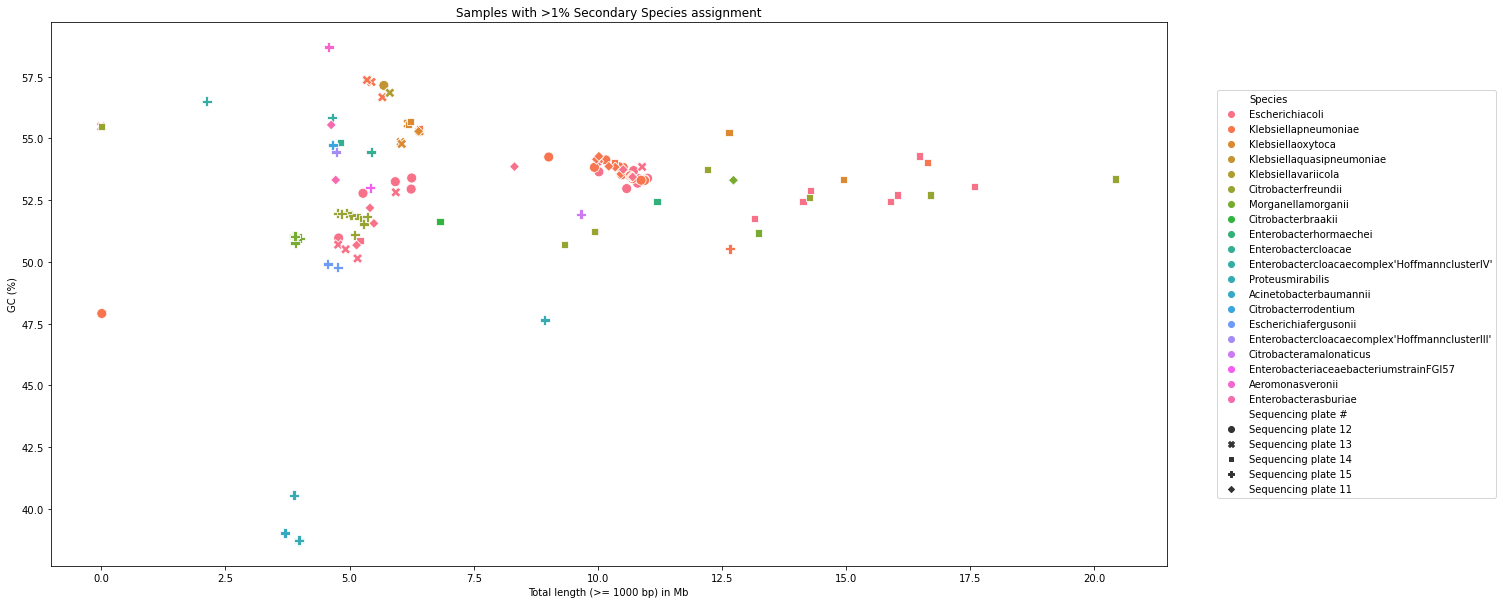

In [154]:
plt.rcParams['figure.figsize'] = [20, 10]
#ax1 = QC_MLST_CARD_Kraken_assembly_multiqc_summary_without_negative.plot.scatter(x = '# contigs', y = 'Total length (>= 0 bp)', hue='Species')
g = sns.scatterplot(data=QC_summary_without_negative_greater_than_1perc, x='Total length (>= 1000 bp)', y='GC (%)', hue='Species', s=100, style='Sequencing plate #')
g.legend(loc='right', bbox_to_anchor=(1.30, 0.5), ncol=1)
g.set_xlabel("Total length (>= 1000 bp) in Mb")
plt.title('Samples with >1% Secondary Species assignment')

- There does seems to be a pattern emerging, most prominently in plate 14. Often, samples with bad assemblies and higher % of secondary species are proximate to each other and in sequential order.

- Many of the samples with Kleb. Pneu as primary species contains high amounts of reads being assigned to Pseudomonas Flouroscense.
- Extract these reads, assemble them and check what they are.